In [1]:
!pip install trax

In [2]:
!pip install wordcloud
!pip install Pillow==9.5.0
!pip install --upgrade pip
!pip install textblob


In [3]:
!pip install nltk

In [4]:
!python --version

Python 3.10.9


In [5]:
!pip install mlxtend

1. Installing all libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
import re
#import trax
import string
from string import punctuation
from nltk import ngrams
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold
import plotly.express as px
import numpy as np
import pandas as pd
from mlxtend.plotting import plot_learning_curves
from sklearn.preprocessing import LabelEncoder


from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from nltk.stem import WordNetLemmatizer, SnowballStemmer

Importing CSV data

In [8]:
df_test = pd.read_csv("/Users/sonali/Documents/Github/drugsComTest_raw.csv")
df_train = pd.read_csv("/Users/sonali/Documents/Github/drugsComTrain_raw.csv")

#df_test = pd.read_csv("/Users/shritej/Documents/GitHub/archive/drugsComTest_raw.csv")
#df_train = pd.read_csv("/Users/shritej/Documents/GitHub/archive/drugsComTrain_raw.csv")

print ("The shape of the train set given is : ", df_train.shape)
print ("The shape of the test set given is : ", df_test.shape)

df_train.head()



The shape of the train set given is :  (161297, 7)
The shape of the test set given is :  (53766, 7)


uniqueID                  drugName                     condition  \
0    206461                 Valsartan  Left Ventricular Dysfunction   
1     95260                Guanfacine                          ADHD   
2     92703                    Lybrel                 Birth Control   
3    138000                Ortho Evra                 Birth Control   
4     35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating       date  \
0  "It has no side effect, I take it in combinati...       9  20-May-12   
1  "My son is halfway through his fourth week of ...       8  27-Apr-10   
2  "I used to take another oral contraceptive, wh...       5  14-Dec-09   
3  "This is my first time using any form of birth...       8  03-Nov-15   
4  "Suboxone has completely turned my life around...       9  27-Nov-16   

   usefulCount  
0           27  
1          192  
2           17  
3           10  
4           37

Data Preprocessing

In [9]:
df_test.head()

uniqueID         drugName                     condition  \
0    163740      Mirtazapine                    Depression   
1    206473       Mesalamine  Crohn's Disease, Maintenance   
2    159672          Bactrim       Urinary Tract Infection   
3     39293         Contrave                   Weight Loss   
4     97768  Cyclafem 1 / 35                 Birth Control   

                                              review  rating       date  \
0  "I&#039;ve tried a few antidepressants over th...      10  28-Feb-12   
1  "My son has Crohn&#039;s disease and has done ...       8  17-May-09   
2                      "Quick reduction of symptoms"       9  29-Sep-17   
3  "Contrave combines drugs that were used for al...       9  05-Mar-17   
4  "I have been on this birth control for one cyc...       9  22-Oct-15   

   usefulCount  
0           22  
1           17  
2            3  
3           35  
4            4

In [10]:

data=pd.concat([df_train,df_test])
data.shape

(215063, 7)

In [11]:
data.sample(100)

uniqueID              drugName            condition  \
78229      78650            Panhematin            Porphyria   
32497      42528              Concerta                 ADHD   
40702      90479             Docosanol       Herpes Simplex   
101043     14066        Beclomethasone  Asthma, Maintenance   
81161     203078     Gildess Fe 1 / 20        Birth Control   
...          ...                   ...                  ...   
107163     91436           Anastrozole    Endometrial Cance   
25139     131319               Finacea                 Acne   
89717      12115  Azilsartan medoxomil  High Blood Pressure   
20994     193850           Hydrocodone                 Pain   
39069     193034     Dextroamphetamine                 ADHD   

                                                   review  rating       date  \
78229   "This breakthrough medication is what kept me ...      10  23-Jan-16   
32497   "Worked for me the first year I took it but th...       5  05-Jan-15   
40702   "I don&#039;t know what they did but this prod...       1  11-Oct-17   
101043  "I feel like it makes my symptoms worse. I get...       3  23-Jan-17   
81161   "I have been on several different kinds of bir...       9  23-Mar-15   
...                                                   ...     ...        ...   
107163  "I have been on this for 9 months now for stag...       9  28-Mar-16   
25139   "In the last I have used Finacea along with So...       9  17-Dec-14   
89717   "I am 69, insulin diabetic, ileostomate for UC...       3  05-Dec-14   
20994   "I have been taking zohydro now for about 3 mo...       9  09-Jul-15   
39069   "This is the best medicine I&#039;ve ever trie...      10  14-Feb-13   

        usefulCount  
78229             3  
32497            76  
40702             0  
101043            6  
81161             7  
...             ...  
107163           22  
25139            34  
89717            13  
20994            45  
39069            53  

[100 rows x 7 columns]

In [12]:
data.describe

<bound method NDFrame.describe of        uniqueID                  drugName                     condition  \
0        206461                 Valsartan  Left Ventricular Dysfunction   
1         95260                Guanfacine                          ADHD   
2         92703                    Lybrel                 Birth Control   
3        138000                Ortho Evra                 Birth Control   
4         35696  Buprenorphine / naloxone             Opiate Dependence   
...         ...                       ...                           ...   
53761    159999                 Tamoxifen     Breast Cancer, Prevention   
53762    140714              Escitalopram                       Anxiety   
53763    130945            Levonorgestrel                 Birth Control   
53764     47656                Tapentadol                          Pain   
53765    113712                 Arthrotec                      Sciatica   

                                                  review  rating 

In [13]:

data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 215063 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     215063 non-null  int64 
 1   drugName     215063 non-null  object
 2   condition    213869 non-null  object
 3   review       215063 non-null  object
 4   rating       215063 non-null  int64 
 5   date         215063 non-null  object
 6   usefulCount  215063 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 13.1+ MB


In [14]:
data.isnull().any()

uniqueID       False
drugName       False
condition       True
review         False
rating         False
date           False
usefulCount    False
dtype: bool

In [15]:
#Null Value
print ("Null values in the dataset : ", data.isnull().sum(axis = 0))

Null values in the dataset :  uniqueID          0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
dtype: int64


In [16]:
# Calculating what percentage of data is null
size = data.shape[0]

print ("Total Size of the dataset : ", size)

total_na = data.isnull().sum(axis = 0)['condition']
print ("Null values : ", total_na)

print ("PERCENTAGE : ", (total_na/size)*100)

Total Size of the dataset :  215063
Null values :  1194
PERCENTAGE :  0.5551861547546533


In [17]:
data = data.dropna(how = 'any', axis = 0)

print ("The shape of the dataset after null values removal :", data.shape)

The shape of the dataset after null values removal : (213869, 7)


In [18]:
data.columns = data.columns.str.lower()

In [19]:
data.sort_values(['uniqueid'], ascending = True, inplace = True)
data.reset_index(drop = True, inplace = True)
data.head(10)

uniqueid             drugname                  condition  \
0         0  Medroxyprogesterone  Abnormal Uterine Bleeding   
1         2  Medroxyprogesterone                 Amenorrhea   
2         3  Medroxyprogesterone  Abnormal Uterine Bleeding   
3         4  Medroxyprogesterone              Birth Control   
4         5  Medroxyprogesterone  Abnormal Uterine Bleeding   
5         6  Medroxyprogesterone              Birth Control   
6         7  Medroxyprogesterone  Abnormal Uterine Bleeding   
7         8  Medroxyprogesterone  Abnormal Uterine Bleeding   
8         9  Medroxyprogesterone  Abnormal Uterine Bleeding   
9        10  Medroxyprogesterone  Abnormal Uterine Bleeding   

                                              review  rating       date  \
0  "Been on the depo injection since January 2015...       3  28-Oct-15   
1  "I&#039;m 21 years old and recently found out ...      10  27-Oct-15   
2  "I have been on the shot 11 years and until a ...       8  27-Oct-15   
3  "Ive had four shots at this point. I was on bi...       9  26-Oct-15   
4  "I had a total of 3 shots. I got my first one ...       1  25-Oct-15   
5  "This is a horrible shot!! I got my first shot...       1  24-Oct-15   
6  "I&#039;m 18 and got this for heavy bleeding. ...       5  22-Oct-15   
7  "Im 19 and have been having heavy and painful ...       5  21-Oct-15   
8  "I&#039;m a 30 year old woman. I got the shot ...       2  21-Oct-15   
9  "I&#039;m 17 years old and I got shot in Augus...       7  20-Oct-15   

   usefulcount  
0            4  
1           11  
2            7  
3           12  
4            4  
5            3  
6            6  
7            2  
8            5  
9            2

In [20]:
print (data['condition'].nunique(), "\n")

916 



In [21]:
print ("some of the conditions are : ", data['condition'].unique()[0:10])

some of the conditions are :  ['Abnormal Uterine Bleeding' 'Amenorrhea' 'Birth Control' 'Endometriosis'
 'Endometrial Hyperplasia, Prophylaxis' 'Renal Cell Carcinoma'
 'Not Listed / Othe' 'Eye Redness' 'Benign Prostatic Hyperplasia' 'Acne']


In [22]:
data.loc[data['rating'] == 1, :]['drugname'].value_counts().head(10)

Miconazole                            767
Ethinyl estradiol / norethindrone     728
Etonogestrel                          707
Levonorgestrel                        511
Nexplanon                             504
Ethinyl estradiol / norgestimate      464
Medroxyprogesterone                   443
Depo-Provera                          417
Tioconazole                           410
Ethinyl estradiol / levonorgestrel    385
Name: drugname, dtype: int64

In [23]:
data.loc[data.usefulcount == 0, 'drugname'].value_counts()


Etonogestrel                         590
Levonorgestrel                       473
Ethinyl estradiol / norethindrone    371
Implanon                             327
Ethinyl estradiol / norgestimate     252
                                    ... 
Transderm-Scop                         1
Glimepiride / pioglitazone             1
Estazolam                              1
Vusion                                 1
Menthol                                1
Name: drugname, Length: 1487, dtype: int64

In [24]:
data['rating'].min()

1

In [25]:
data['date'] = pd.to_datetime(data['date'])

#### Exploratory data analysis

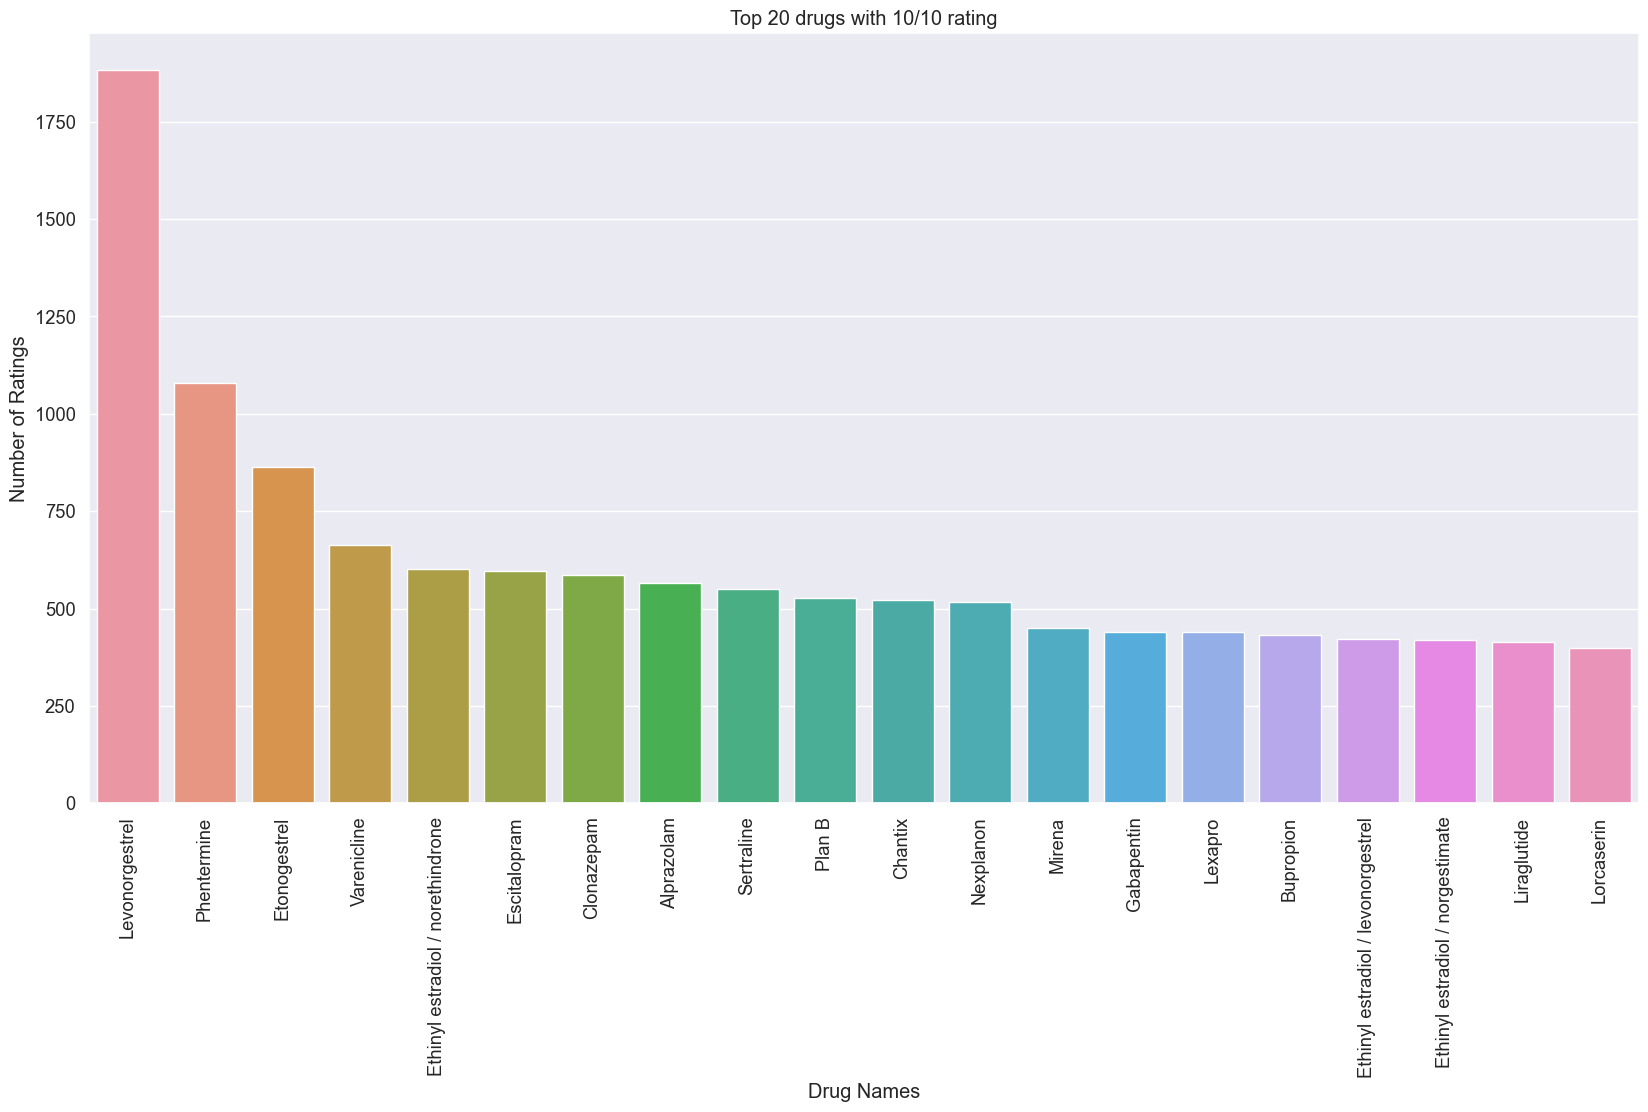

In [26]:

#This barplot shows the top 20 drugs with the 10/10 rating
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [20, 10]

rating = dict(data.loc[data.rating == 10, "drugname"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

sns_rating.set(title = 'Top 20 drugs with 10/10 rating', ylabel = 'Number of Ratings', xlabel = "Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);


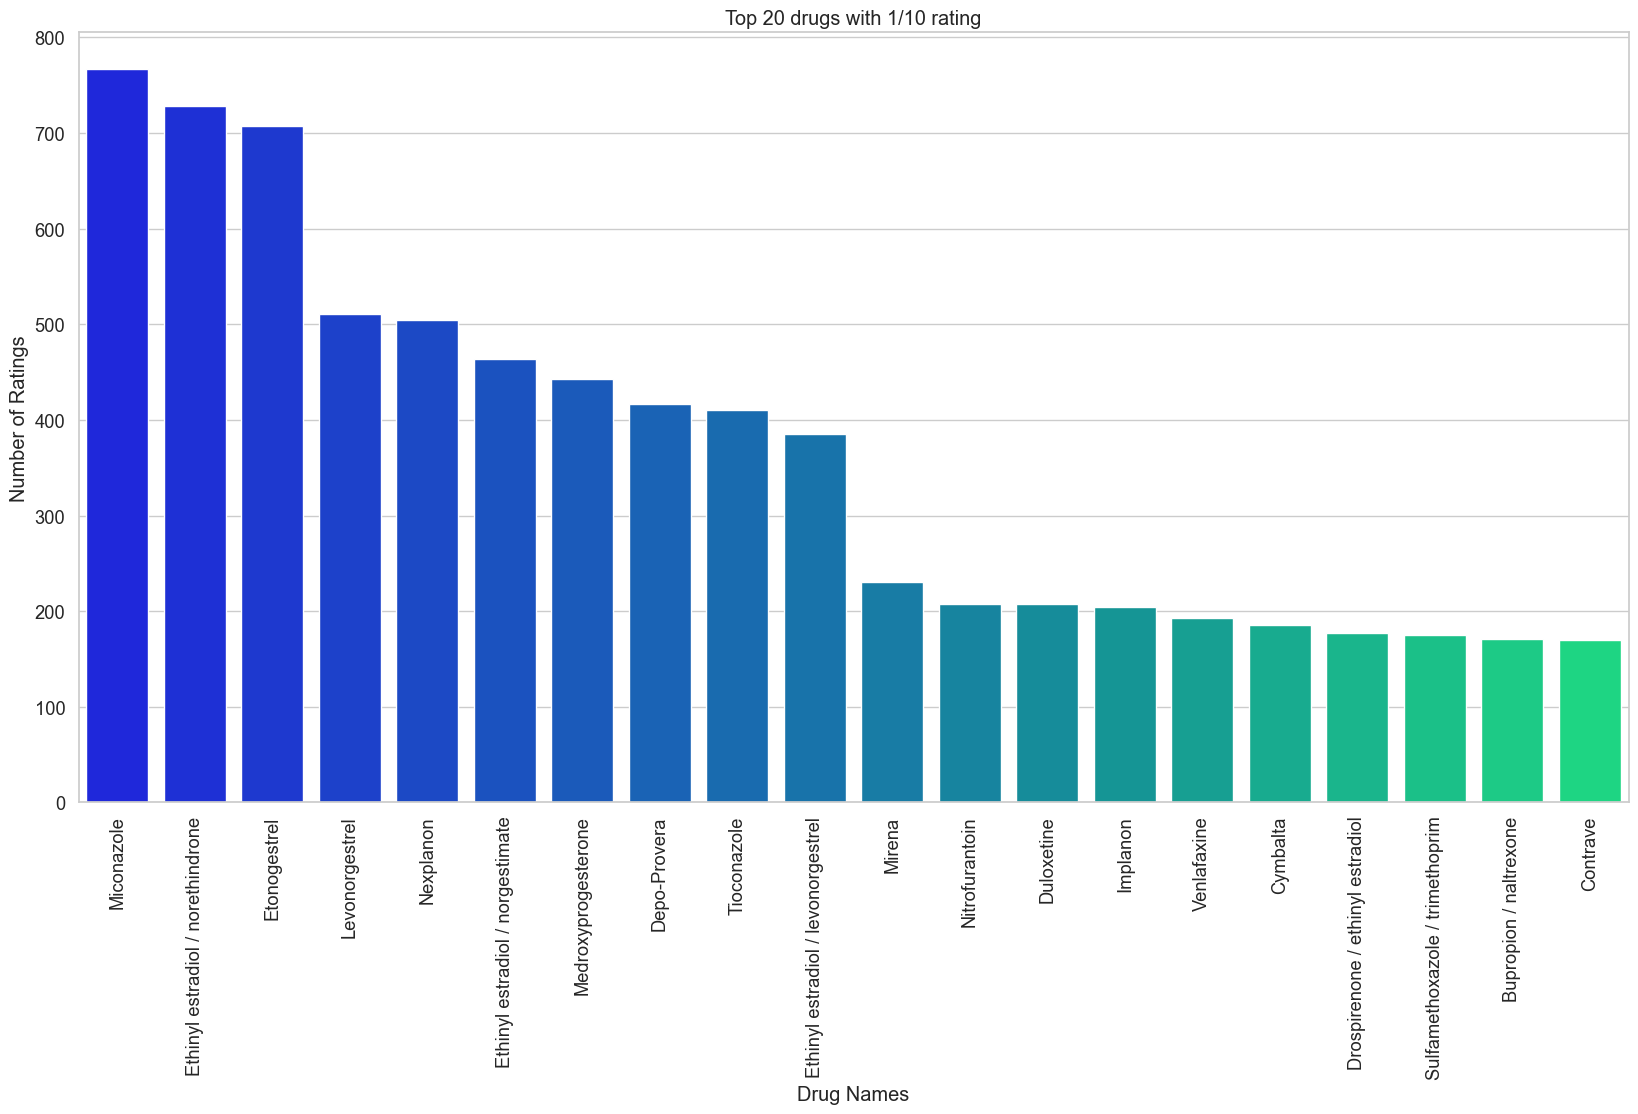

In [71]:
sns.set(font_scale = 1.2, style = 'whitegrid')
plt.rcParams['figure.figsize'] = [20, 10]

rating = dict(data.loc[data.rating == 1, "drugname"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'winter')

sns_rating.set(title = 'Top 20 drugs with 1/10 rating', ylabel = 'Number of Ratings', xlabel = "Drug Names")

plt.setp(sns_rating.get_xticklabels(), rotation=90);

plt.savefig('plot_image.png') 

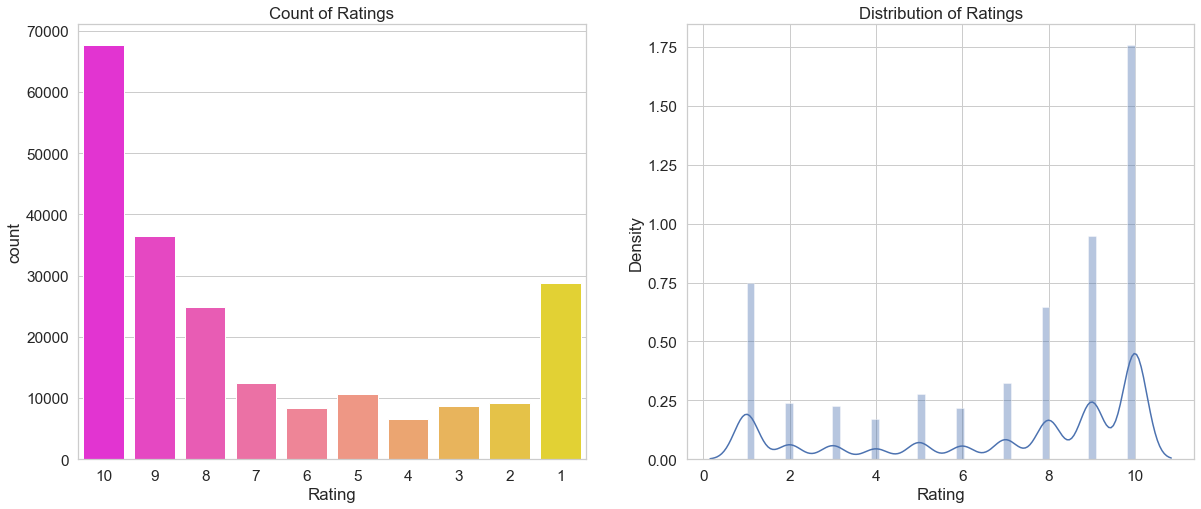

In [56]:
# A countplot of the ratings so we can see the distribution of the ratings
# plt.rcParams['figure.figsize'] = [20,8]
# sns.set(font_scale = 1.4, style = 'whitegrid')
# fig, ax = plt.subplots(1, 2)

# sns_1 = sns.countplot(data['rating'], palette = 'spring', order = list(range(10, 0, -1)), ax = ax[0])
# sns_2 = sns.distplot(data['rating'], ax = ax[1])
# sns_1.set_title('Count of Ratings')
# sns_1.set_xlabel("Rating")

# sns_2.set_title('Distribution of Ratings')
# sns_2.set_xlabel("Rating");

from PIL import Image
from IPython.display import display  # Only needed in Jupyter notebooks

# Open the PNG image
image_path = 'distribution of reviews vs ratings.png'
image = Image.open(image_path)

display(image)

#code was not 


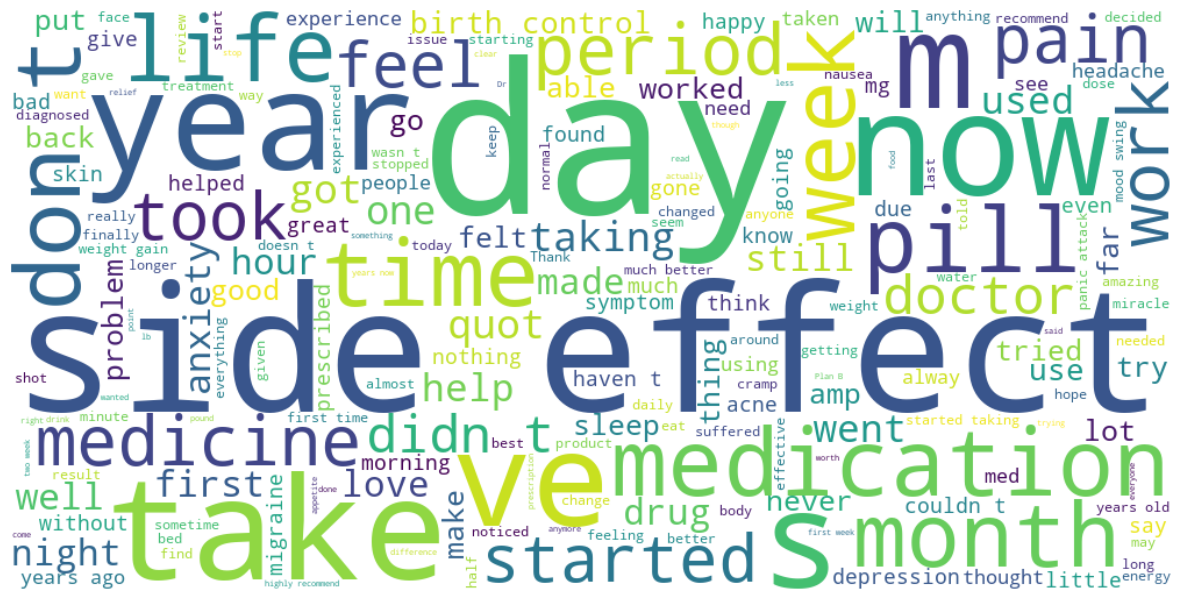

In [29]:
# Word cloud of the reviews with rating equal to 10
df_rate_ten = data.loc[data.rating == 10, 'review']
k = (' '.join(df_rate_ten))

wordcloud = WordCloud(width = 1000, height = 500, background_color = 'white').generate(k)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off');

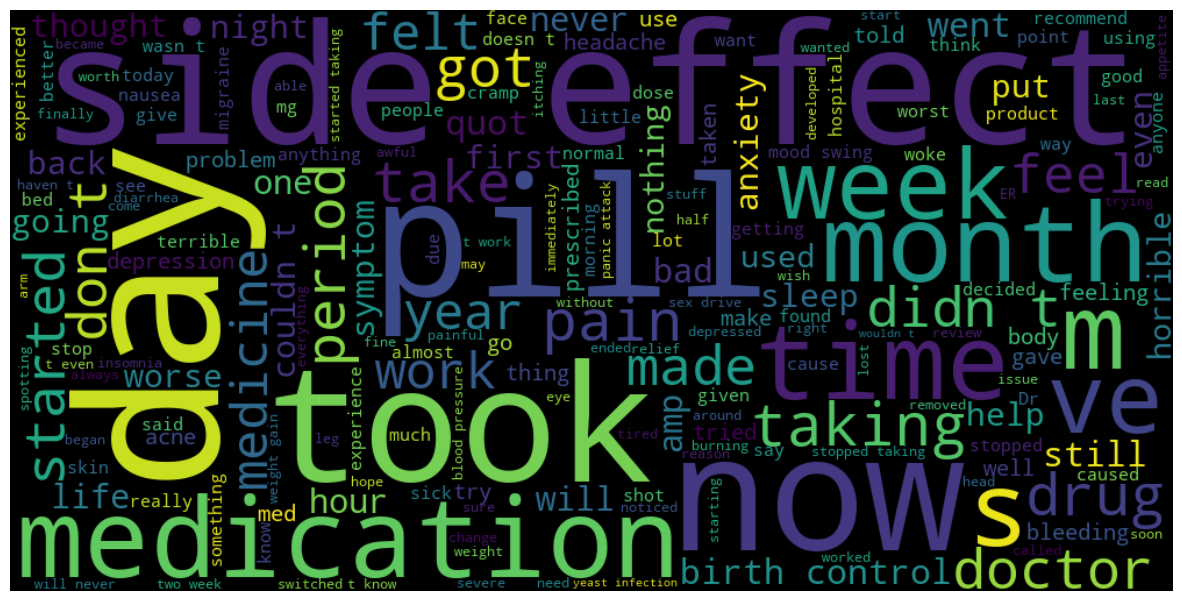

In [30]:
# Word cloud of the reviews with rating equal to 1

df_rate_one = data.loc[data.rating == 1, 'review']
k1 = (' '.join(df_rate_one))

wordcloud = WordCloud(width = 1000, height = 500).generate(k1)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off');

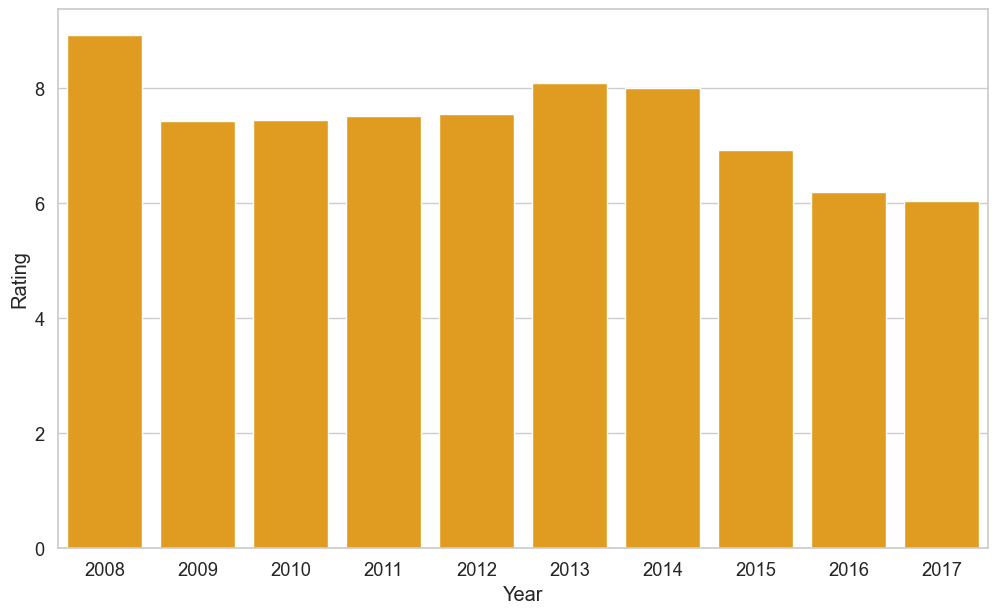

In [72]:
# This barplot shows the mean rating of the drugs per year

mean_rating = dict(data.groupby(data['date'].dt.year)['rating'].mean())
plt.rcParams['figure.figsize'] = [12, 7]
sns.set(font_scale = 1.2, style = 'whitegrid')
sns_ = sns.barplot(x = list(mean_rating.keys()), y = list(mean_rating.values()), color = 'orange');
sns_.set_xlabel("Year")
sns_.set_ylabel("Rating");
plt.savefig('plot_image.png') 

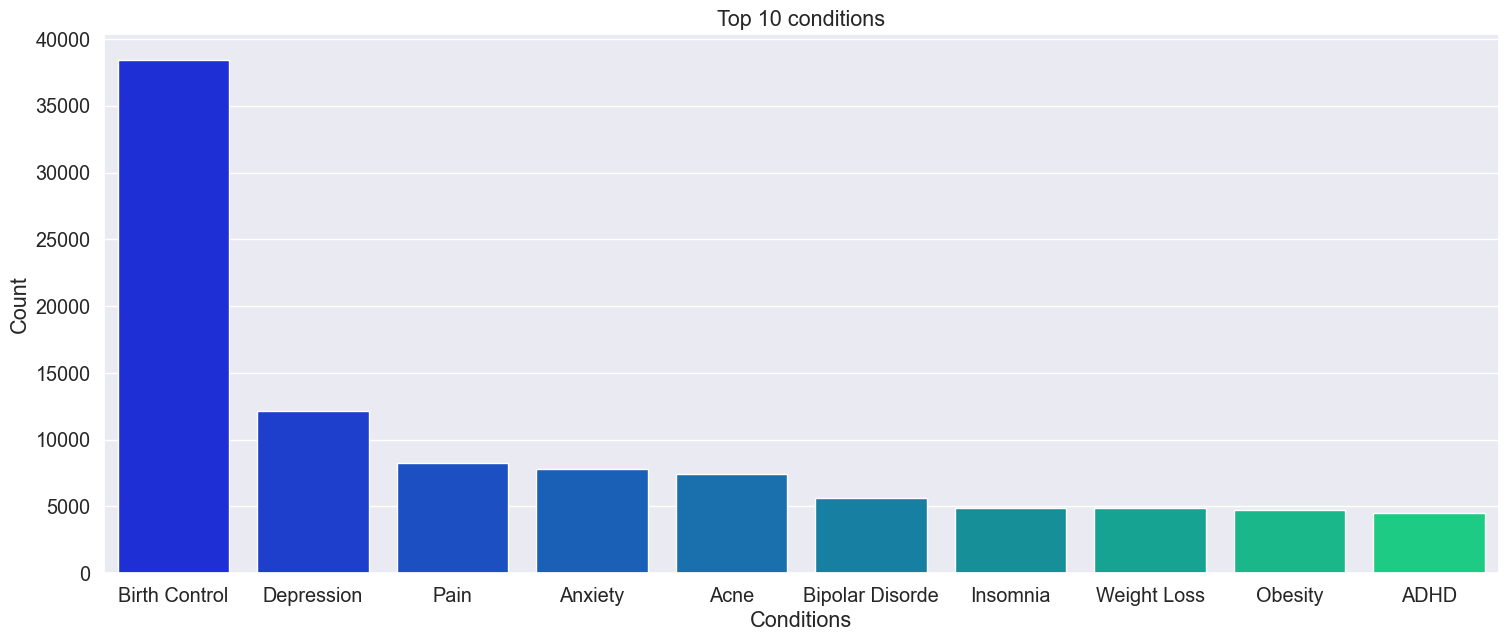

In [32]:
# This barplot show the top 10 conditions the people are suffering.

cond = dict(data['condition'].value_counts())
top_condition = list(cond.keys())[0:10]
values = list(cond.values())[0:10]
sns.set(style = 'darkgrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [18, 7]

sns_ = sns.barplot(x = top_condition, y = values, palette = 'winter')
sns_.set_title("Top 10 conditions")
sns_.set_xlabel("Conditions")
sns_.set_ylabel("Count");

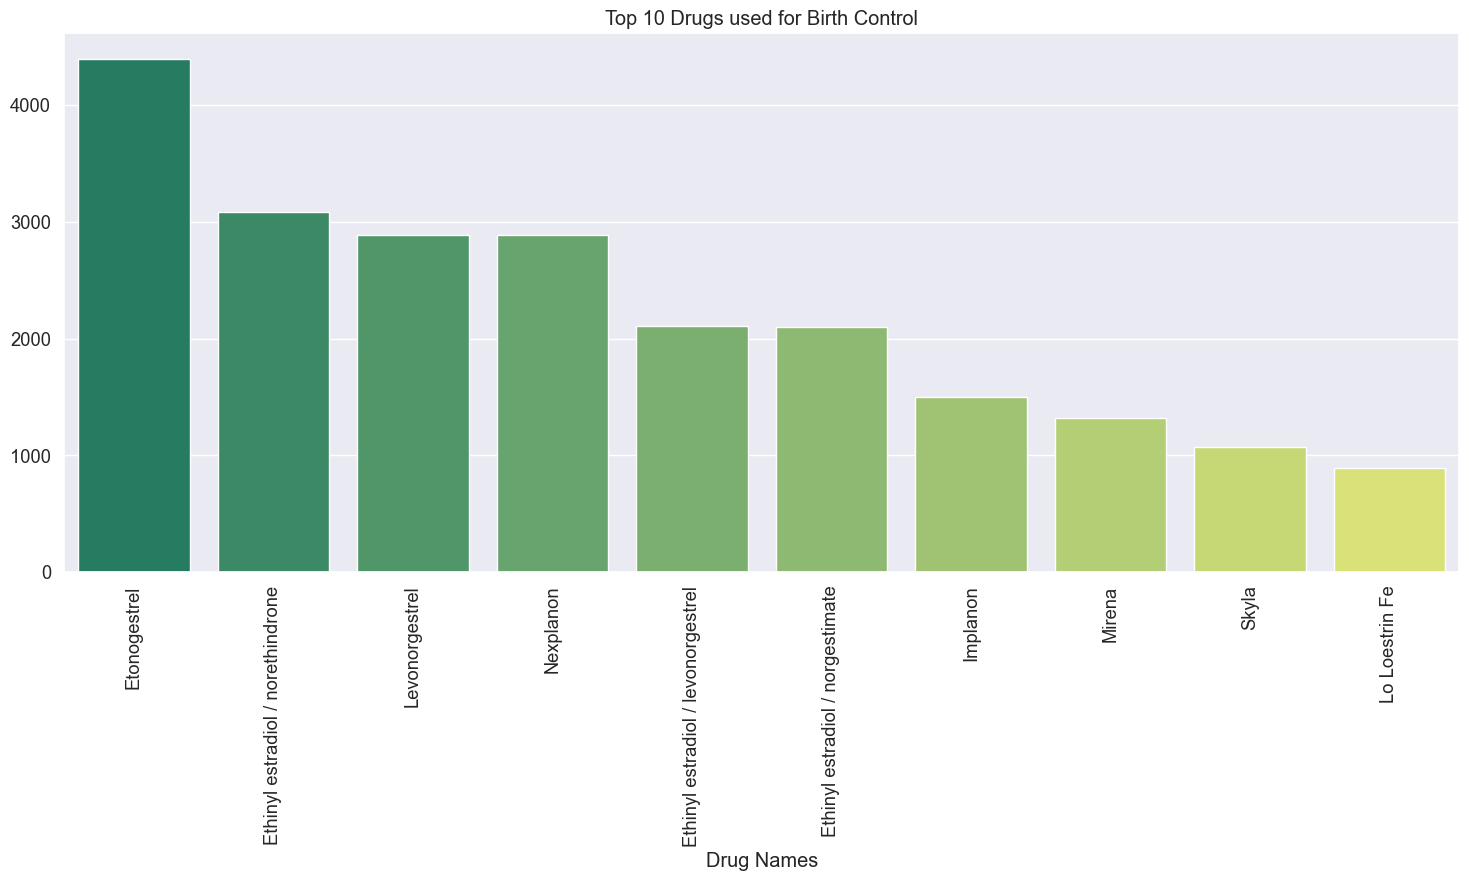

In [33]:
# Top 10 drugs which are used for the top condition, that is Birth Control

df = data[data['condition'] == 'Birth Control']['drugname'].value_counts()[0: 10]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df.index, y = df.values, palette = 'summer')
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 Drugs used for Birth Control")
plt.setp(sns_.get_xticklabels(), rotation = 90);

<Axes: xlabel='usefulcount', ylabel='Density'>

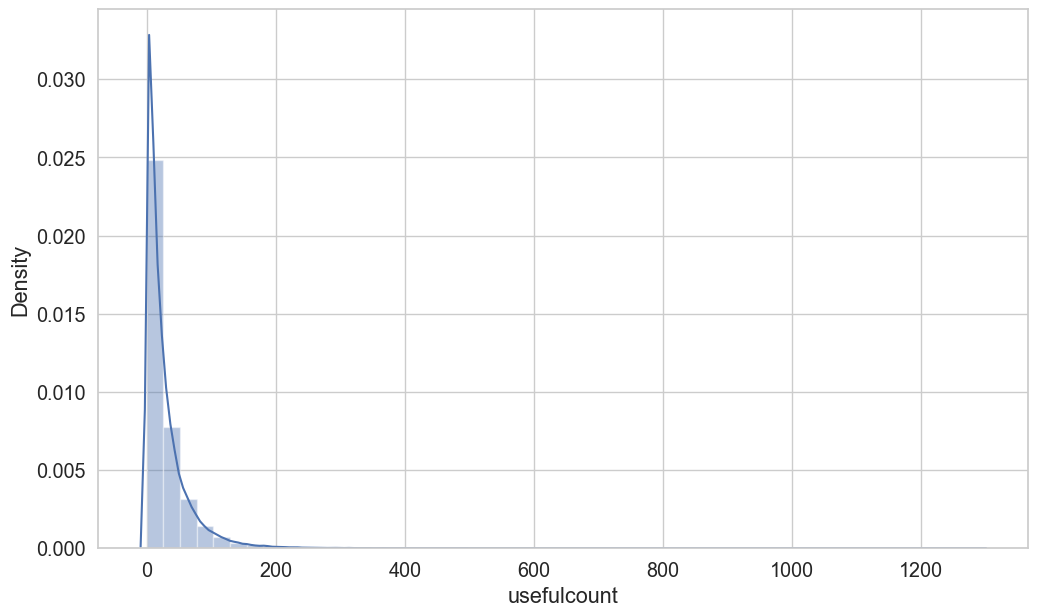

In [34]:
# Distribution of the useful count
sns.set(style = 'whitegrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [12, 7]
sns.distplot(data['usefulcount'].dropna())

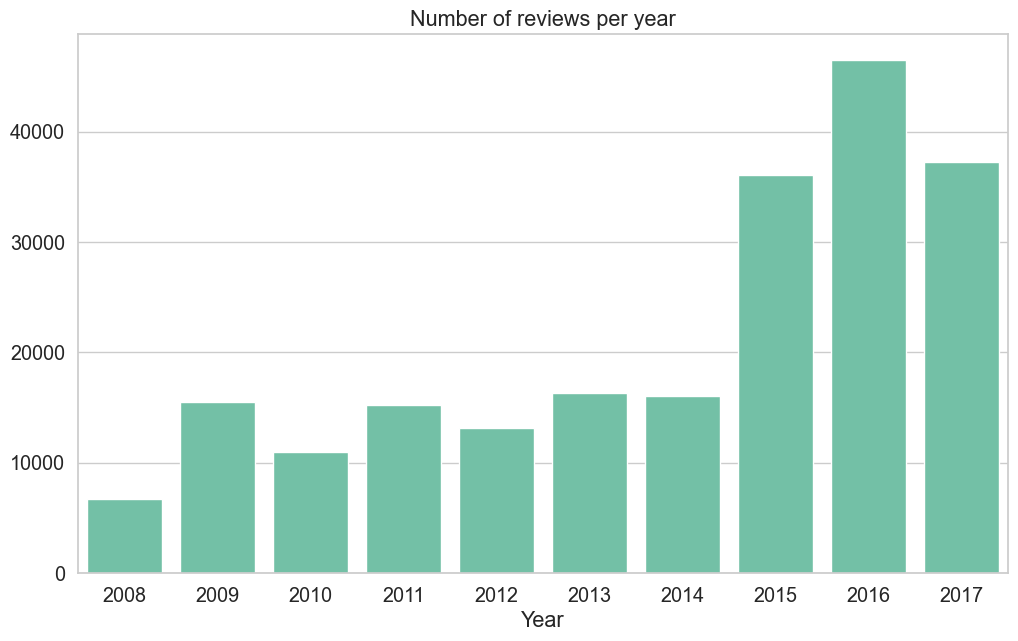

In [35]:
# This barplot shows the number of reviews per year
df = data['date'].dt.year.value_counts()
df = df.sort_index()

sns_ = sns.barplot(x = df.index, y = df.values, color = 'mediumaquamarine')
sns_.set_title("Number of reviews per year")
sns_.set_xlabel("Year");

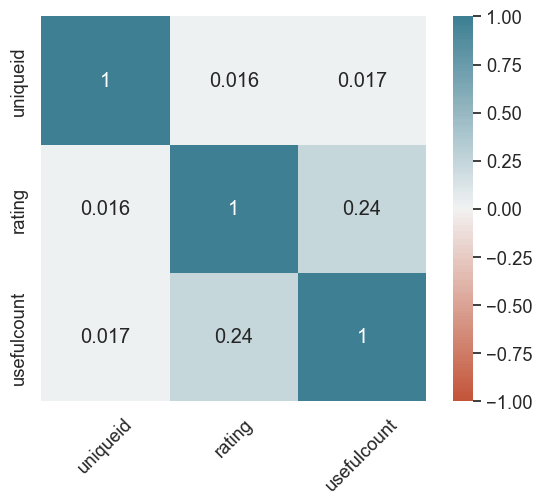

In [36]:
# Heatmap of the correlation matrix
plt.rcParams['figure.figsize'] = [7,5]
sns.set(font_scale = 1.2)
corr = data.select_dtypes(include = 'int64').corr()
sns_heat = sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(20, 220, n=200), square=True);
plt.setp(sns_heat.get_xticklabels(), rotation = 45);

### Labels Preprocessing

In [37]:
def plot_bar_chart(df):
    # analyze the condition labels
    counts_series = df.condition.value_counts()
    counts_df = pd.DataFrame(counts_series)
    counts_df.reset_index(level=0, inplace=True)

    number_of_classes(df)

    fig = px.bar(counts_df, x="index", y="condition", orientation='v',
              height=400,
              title='xc')
    fig.show()

def number_of_classes(df):
    print("Number of classes: ", len(df["condition"].unique()))

Class Distribution

In [38]:
# Keeping classes which have more than 20 values in them
index_counts = df_train["condition"].value_counts()[df_train.condition.value_counts() >= 20].index
df_train = df_train[df_train["condition"].isin(index_counts)]

number_of_classes(df_train)

Number of classes:  330


In [39]:
plot_bar_chart(df_train) 

Number of classes:  330


### Undersampling classes with more than 200 samples (only 200 reviews)

In [40]:
# undersampling all classes with samples greater than 200 to 200
condition_over200 = df_train["condition"].value_counts()[df_train.condition.value_counts() >= 200].index

for condition in condition_over200:
    # randomly shuffle the samples
    condition_samples = df_train[df_train["condition"]==condition]
    condition_samples = condition_samples.sample(frac=1).reset_index(drop=True)

    # extract only 200
    condition_samples = condition_samples[:200]

    df_train = df_train[df_train["condition"]!=condition]
    # put it back
    df_train = pd.concat([df_train, condition_samples], ignore_index=True)

In [41]:
plot_bar_chart(df_train)

Number of classes:  330


Filtering Labels and removing alpha numeric values

In [42]:
def filter_labels(labels):
    labels = labels.tolist()
    labels_truth = []
    for label in labels:
        #print(label)
        if label[0].isdigit():
            labels_truth.append(False)
        else:
            labels_truth.append(True)
    return labels_truth

df_train = df_train[filter_labels(df_train["condition"])]
print("Train ", number_of_classes(df_train))

Number of classes:  318
Train  None


In [43]:
plot_bar_chart(df_train)

Number of classes:  318


##### Dropping all NA values of test data


In [44]:

df_test.dropna(how = 'any', axis = 0, inplace = True)
df_test = df_test[filter_labels(df_test["condition"])]
print("Test ", number_of_classes(df_test))

Number of classes:  664
Test  None


Only keeping the classes that are in the training set, in to the test set

In [45]:
df_test = df_test[df_test["condition"].isin(df_train["condition"])]
number_of_classes(df_test)

Number of classes:  318


Using stopwords to focus on important words.
Using stemmer to focus on the standard form of the words.

#### NLP Preprocessing on reviews: 
##### Removing stopwords and punctuations
##### Stemming using Snowball Stemmer algorithm 

In [46]:
import string
nltk.download('stopwords')
def filter_data(reviews):
  
  """
  Filter the corpus of training and testing df.
  This function removes stop and stem words from the corpus
  :param reviews:
  :return:
  """
  stop = stopwords.words('english')
  stemmer = SnowballStemmer("english")

  # remove punctuations
  series = reviews.str.replace('[{}]'.format(string.punctuation), '')

  # remove stop words
  series = series.apply(
      lambda x: ' '.join([word for word in x.split() if word not in stop]))

  # remove stem words
  series = series.apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

  return series
    
df_train["review"] = filter_data(df_train["review"]).str.lower()
df_test["review"] = filter_data(df_test["review"]).str.lower()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sonali/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
df_train

uniqueID        drugName                     condition  \
0        191290         Pentasa               Crohn's Disease   
1        119705       Nilotinib  Chronic Myelogenous Leukemia   
2        206180    Eflornithine                     Hirsutism   
3        206444        Trilafon                     Psychosis   
4        215018          Opdivo     Non-Small Cell Lung Cance   
...         ...             ...                           ...   
36354    156836  Transderm-Scop               Motion Sickness   
36355     27648  Dimenhydrinate               Motion Sickness   
36356    175329     Scopolamine               Motion Sickness   
36357      5568          Bonine               Motion Sickness   
36358     27633  Dimenhydrinate               Motion Sickness   

                                                  review  rating       date  \
0      i crohn039 resect 30 year ago most remiss sinc...       4  06-Jul-13   
1      i tasigna 3 year 300mg x 2 time day tasigna wo...      10  01-Sep-15   
2      i039m write second review vaniqa i start use f...      10  11-May-14   
3      i similar experi tremor hand realli notic some...       9  23-May-11   
4      my mother die lung cancer her last hope medic ...       1  02-Mar-17   
...                                                  ...     ...        ...   
36354  use patch trip oversea i would boat also drive...       6  16-Nov-14   
36355                                          chap hand      10  06-Jan-14   
36356  this stuff work fantast motion sick vr sick i ...      10  14-Jul-16   
36357  my sister i long histori motion sick rock chai...      10  07-Sep-17   
36358  i enjoy sport fish time 3 4 day sea 30footer b...       9  17-Aug-16   

       usefulCount  
0                8  
1               11  
2               99  
3               45  
4                6  
...            ...  
36354           10  
36355           12  
36356           18  
36357            2  
36358            5  

[35704 rows x 7 columns]

In [48]:

# shuffle the training dataframe and saving the columns in X and Y
df_train["Label"] = df_train["condition"].str.lower()
df_test["Label"] = df_test["condition"].str.lower()

df_train = df_train.sample(frac=1)
X = df_train['review']
Y = df_train['Label']

Creating Count Vectorizer Object and transforming whole training dataset from it.

Count vectorizer:-Countvectorizer is a method to convert unstructure text data into tabular form with counting word considering unigram and bigrams both

In [49]:
count_vectorizer = CountVectorizer(ngram_range=(1,2))
X_count_vec = count_vectorizer.fit_transform(X)

In [50]:
X_count_vec

<35704x546016 sparse matrix of type '<class 'numpy.int64'>'
	with 2663168 stored elements in Compressed Sparse Row format>

Defining a function for 4-Fold Cross Validation for multiple classifiers

In [51]:
def cross_val_multiple_classifiers(X, Y):
  classifiers = [MultinomialNB(), SGDClassifier(loss="modified_huber", verbose = 1), 
                 RandomForestClassifier(n_estimators=100, verbose = 1), 
                 KNeighborsClassifier(n_neighbors=5)]
  labels = ['Multinomial Naive Bayes', 'SGD Classifier', 'Random Forest',  'KNN']
  clf_cv_mean = []
  clf_cv_std = []
  for clf, label in zip(classifiers, labels): 
      scores = cross_val_score(clf, X, Y, cv=4, scoring='accuracy')
      print ("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))

# calling multiple classifiers on the vectorized features
cross_val_multiple_classifiers(X_count_vec, Y)

Accuracy: 0.49 (+/- 0.00) [Multinomial Naive Bayes]
-- Epoch 1
Norm: 189.25, NNZs: 11177, Bias: -8.206031, T: 26778, Avg. loss: 2.567433
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 114.51, NNZs: 13824, Bias: -8.252315, T: 53556, Avg. loss: 0.165987
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 79.57, NNZs: 14388, Bias: -8.244477, T: 80334, Avg. loss: 0.020298
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 61.71, NNZs: 14808, Bias: -8.229094, T: 107112, Avg. loss: 0.009024
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 49.91, NNZs: 14970, Bias: -8.219608, T: 133890, Avg. loss: 0.001447
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 41.78, NNZs: 15091, Bias: -8.215387, T: 160668, Avg. loss: 0.000240
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 36.08, NNZs: 15151, Bias: -8.208169, T: 187446, Avg. loss: 0.000267
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 31.68, NNZs: 15151, Bias: -8.204878, T: 214224, Avg. loss: 0.000097
Total training time: 0.0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Norm: 82.46, NNZs: 2965, Bias: -3.285601, T: 26778, Avg. loss: 0.194904
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 43.01, NNZs: 3154, Bias: -3.316512, T: 53556, Avg. loss: 0.002971
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 28.89, NNZs: 3172, Bias: -3.303522, T: 80334, Avg. loss: 0.000611
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 21.78, NNZs: 3172, Bias: -3.295544, T: 107112, Avg. loss: 0.000645
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 17.49, NNZs: 3178, Bias: -3.289652, T: 133890, Avg. loss: 0.000609
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 14.65, NNZs: 3186, Bias: -3.283873, T: 160668, Avg. loss: 0.000664
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 12.63, NNZs: 3186, Bias: -3.278527, T: 187446, Avg. loss: 0.000659
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 11.13, NNZs: 3186, Bias: -3.273751, T: 214224, Avg. loss: 0.000618
Total training time: 0.06 seconds.
Convergence after 8 epochs took 0.06 seconds
-- Epoch 1
Norm: 

Norm: 22.59, NNZs: 16215, Bias: -8.104364, T: 321336, Avg. loss: 0.003256
Total training time: 0.08 seconds.
Convergence after 12 epochs took 0.08 seconds
-- Epoch 1
Norm: 81.70, NNZs: 2971, Bias: -3.852556, T: 26778, Avg. loss: 0.302685
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 41.62, NNZs: 3020, Bias: -3.873225, T: 53556, Avg. loss: 0.000125
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 28.02, NNZs: 3020, Bias: -3.870193, T: 80334, Avg. loss: 0.000047
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 21.08, NNZs: 3020, Bias: -3.870193, T: 107112, Avg. loss: 0.000000
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 16.89, NNZs: 3020, Bias: -3.870193, T: 133890, Avg. loss: 0.000000
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 14.09, NNZs: 3020, Bias: -3.870193, T: 160668, Avg. loss: 0.000000
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 12.09, NNZs: 3020, Bias: -3.870193, T: 187446, Avg. loss: 0.000000
Total training time: 0.04 seconds.
Convergence aft

Norm: 25.96, NNZs: 5523, Bias: -6.229769, T: 133890, Avg. loss: 0.001632
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 21.82, NNZs: 5556, Bias: -6.223007, T: 160668, Avg. loss: 0.001255
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 19.08, NNZs: 5650, Bias: -6.212410, T: 187446, Avg. loss: 0.001376
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 16.84, NNZs: 5720, Bias: -6.206715, T: 214224, Avg. loss: 0.001058
Total training time: 0.05 seconds.
Convergence after 8 epochs took 0.05 seconds
-- Epoch 1
Norm: 202.23, NNZs: 13822, Bias: -10.782150, T: 26778, Avg. loss: 2.918695
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 117.41, NNZs: 15776, Bias: -10.825682, T: 53556, Avg. loss: 0.125402
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 82.58, NNZs: 16450, Bias: -10.755043, T: 80334, Avg. loss: 0.030800
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 64.03, NNZs: 16849, Bias: -10.700095, T: 107112, Avg. loss: 0.011825
Total training time: 0.03 seconds.
-- Epoc

Norm: 23.83, NNZs: 5256, Bias: -5.332479, T: 133890, Avg. loss: 0.000983
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 19.95, NNZs: 5256, Bias: -5.327280, T: 160668, Avg. loss: 0.000849
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 17.27, NNZs: 5256, Bias: -5.320277, T: 187446, Avg. loss: 0.000963
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 15.22, NNZs: 5256, Bias: -5.315735, T: 214224, Avg. loss: 0.000849
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 13.60, NNZs: 5256, Bias: -5.312478, T: 241002, Avg. loss: 0.000818
Total training time: 0.06 seconds.
Convergence after 9 epochs took 0.06 seconds
-- Epoch 1
Norm: 152.91, NNZs: 8049, Bias: -7.641996, T: 26778, Avg. loss: 1.228986
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 85.06, NNZs: 9198, Bias: -7.613251, T: 53556, Avg. loss: 0.045723
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 58.04, NNZs: 9369, Bias: -7.596595, T: 80334, Avg. loss: 0.008277
Total training time: 0.02 seconds.
-- Epoch 4
Norm:

Norm: 22.49, NNZs: 8666, Bias: -9.565126, T: 214224, Avg. loss: 0.000862
Total training time: 0.05 seconds.
Convergence after 8 epochs took 0.05 seconds
-- Epoch 1
Norm: 179.83, NNZs: 10189, Bias: -10.520727, T: 26778, Avg. loss: 2.314194
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 101.00, NNZs: 11734, Bias: -10.621932, T: 53556, Avg. loss: 0.082401
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 70.01, NNZs: 12200, Bias: -10.585232, T: 80334, Avg. loss: 0.015105
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 54.20, NNZs: 12341, Bias: -10.543541, T: 107112, Avg. loss: 0.004806
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 44.47, NNZs: 12561, Bias: -10.525112, T: 133890, Avg. loss: 0.002880
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 37.98, NNZs: 12666, Bias: -10.501778, T: 160668, Avg. loss: 0.003394
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 33.34, NNZs: 12982, Bias: -10.493714, T: 187446, Avg. loss: 0.001671
Total training time: 0.05 seconds.
-

Norm: 22.80, NNZs: 15337, Bias: -9.212984, T: 321336, Avg. loss: 0.005277
Total training time: 0.08 seconds.
-- Epoch 13
Norm: 21.55, NNZs: 15676, Bias: -9.199272, T: 348114, Avg. loss: 0.005083
Total training time: 0.08 seconds.
Convergence after 13 epochs took 0.08 seconds
-- Epoch 1
Norm: 68.32, NNZs: 2294, Bias: -3.752933, T: 26778, Avg. loss: 0.191190
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 35.90, NNZs: 2403, Bias: -3.762302, T: 53556, Avg. loss: 0.004455
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 24.10, NNZs: 2403, Bias: -3.761091, T: 80334, Avg. loss: 0.000003
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 18.20, NNZs: 2403, Bias: -3.757905, T: 107112, Avg. loss: 0.000047
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 14.62, NNZs: 2403, Bias: -3.756962, T: 133890, Avg. loss: 0.000015
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 12.27, NNZs: 2403, Bias: -3.754935, T: 160668, Avg. loss: 0.000052
Total training time: 0.04 seconds.
-- Epoch 7
No

-- Epoch 1
Norm: 168.53, NNZs: 8855, Bias: -8.274118, T: 26778, Avg. loss: 1.818122
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 94.90, NNZs: 10446, Bias: -8.315166, T: 53556, Avg. loss: 0.071262
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 66.38, NNZs: 11064, Bias: -8.279874, T: 80334, Avg. loss: 0.012622
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 50.62, NNZs: 11206, Bias: -8.249225, T: 107112, Avg. loss: 0.004714
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 40.91, NNZs: 11320, Bias: -8.234709, T: 133890, Avg. loss: 0.001378
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 34.54, NNZs: 11533, Bias: -8.220318, T: 160668, Avg. loss: 0.001124
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 30.46, NNZs: 11909, Bias: -8.204679, T: 187446, Avg. loss: 0.001848
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 27.08, NNZs: 12133, Bias: -8.191796, T: 214224, Avg. loss: 0.001041
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 24.40, NNZs: 12204, Bias: 

Norm: 106.33, NNZs: 4582, Bias: -6.607428, T: 26778, Avg. loss: 0.910463
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 58.60, NNZs: 5060, Bias: -6.526877, T: 53556, Avg. loss: 0.022807
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 40.32, NNZs: 5211, Bias: -6.484477, T: 80334, Avg. loss: 0.005516
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 31.11, NNZs: 5307, Bias: -6.444581, T: 107112, Avg. loss: 0.003058
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 25.42, NNZs: 5384, Bias: -6.423659, T: 133890, Avg. loss: 0.001411
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 21.69, NNZs: 5444, Bias: -6.406336, T: 160668, Avg. loss: 0.001334
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 19.23, NNZs: 5655, Bias: -6.389827, T: 187446, Avg. loss: 0.001638
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 17.46, NNZs: 6165, Bias: -6.373917, T: 214224, Avg. loss: 0.001551
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 16.23, NNZs: 6405, Bias: -6.356995, T: 24100

Norm: 18.75, NNZs: 8518, Bias: -6.667167, T: 267780, Avg. loss: 0.007247
Total training time: 0.06 seconds.
-- Epoch 11
Norm: 17.68, NNZs: 8639, Bias: -6.652640, T: 294558, Avg. loss: 0.007266
Total training time: 0.07 seconds.
-- Epoch 12
Norm: 16.83, NNZs: 9151, Bias: -6.635983, T: 321336, Avg. loss: 0.005176
Total training time: 0.08 seconds.
-- Epoch 13
Norm: 16.10, NNZs: 9309, Bias: -6.623264, T: 348114, Avg. loss: 0.006565
Total training time: 0.08 seconds.
-- Epoch 14
Norm: 15.30, NNZs: 9728, Bias: -6.615026, T: 374892, Avg. loss: 0.005559
Total training time: 0.09 seconds.
-- Epoch 15
Norm: 14.86, NNZs: 10311, Bias: -6.601960, T: 401670, Avg. loss: 0.005613
Total training time: 0.10 seconds.
-- Epoch 16
Norm: 14.30, NNZs: 10553, Bias: -6.593759, T: 428448, Avg. loss: 0.005053
Total training time: 0.10 seconds.
-- Epoch 17
Norm: 13.92, NNZs: 11082, Bias: -6.584100, T: 455226, Avg. loss: 0.004640
Total training time: 0.11 seconds.
Convergence after 17 epochs took 0.11 seconds
-- 

Norm: 21.39, NNZs: 5539, Bias: -5.366531, T: 160668, Avg. loss: 0.001354
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 18.58, NNZs: 5693, Bias: -5.355454, T: 187446, Avg. loss: 0.001355
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 16.46, NNZs: 5818, Bias: -5.347297, T: 214224, Avg. loss: 0.001186
Total training time: 0.05 seconds.
Convergence after 8 epochs took 0.05 seconds
-- Epoch 1
Norm: 122.79, NNZs: 5637, Bias: -5.176554, T: 26778, Avg. loss: 0.691612
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 69.04, NNZs: 6696, Bias: -5.274104, T: 53556, Avg. loss: 0.036063
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 47.15, NNZs: 6892, Bias: -5.282537, T: 80334, Avg. loss: 0.002604
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 35.86, NNZs: 7107, Bias: -5.275117, T: 107112, Avg. loss: 0.000308
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 28.93, NNZs: 7194, Bias: -5.268054, T: 133890, Avg. loss: 0.000354
Total training time: 0.03 seconds.
-- Epoch 6
Norm:

Norm: 13.49, NNZs: 4159, Bias: -5.816027, T: 214224, Avg. loss: 0.000079
Total training time: 0.05 seconds.
Convergence after 8 epochs took 0.05 seconds
-- Epoch 1
Norm: 120.48, NNZs: 6028, Bias: -5.407715, T: 26778, Avg. loss: 0.873962
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 64.10, NNZs: 6495, Bias: -5.370774, T: 53556, Avg. loss: 0.022177
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 43.59, NNZs: 6560, Bias: -5.322516, T: 80334, Avg. loss: 0.002893
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 33.15, NNZs: 6737, Bias: -5.295205, T: 107112, Avg. loss: 0.002004
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 27.13, NNZs: 6823, Bias: -5.271189, T: 133890, Avg. loss: 0.002020
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 23.66, NNZs: 6935, Bias: -5.243843, T: 160668, Avg. loss: 0.003161
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 21.00, NNZs: 7138, Bias: -5.224043, T: 187446, Avg. loss: 0.002131
Total training time: 0.05 seconds.
-- Epoch 8
Norm:

Norm: 28.41, NNZs: 7738, Bias: -8.449366, T: 160668, Avg. loss: 0.000134
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 24.55, NNZs: 7792, Bias: -8.444116, T: 187446, Avg. loss: 0.000232
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 21.54, NNZs: 7792, Bias: -8.443025, T: 214224, Avg. loss: 0.000046
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 19.31, NNZs: 7792, Bias: -8.439333, T: 241002, Avg. loss: 0.000199
Total training time: 0.06 seconds.
Convergence after 9 epochs took 0.06 seconds
-- Epoch 1
Norm: 195.53, NNZs: 11995, Bias: -9.873898, T: 26778, Avg. loss: 2.807572
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 109.86, NNZs: 13428, Bias: -9.949994, T: 53556, Avg. loss: 0.115461
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 76.24, NNZs: 13906, Bias: -9.946535, T: 80334, Avg. loss: 0.012435
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 58.76, NNZs: 14455, Bias: -9.933893, T: 107112, Avg. loss: 0.005904
Total training time: 0.03 seconds.
-- Epoch 5


Norm: 85.28, NNZs: 17245, Bias: -11.811823, T: 80334, Avg. loss: 0.028864
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 65.93, NNZs: 17690, Bias: -11.784149, T: 107112, Avg. loss: 0.010898
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 54.73, NNZs: 18098, Bias: -11.733983, T: 133890, Avg. loss: 0.011698
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 46.50, NNZs: 18263, Bias: -11.705086, T: 160668, Avg. loss: 0.006082
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 40.39, NNZs: 18333, Bias: -11.683669, T: 187446, Avg. loss: 0.004661
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 36.11, NNZs: 18595, Bias: -11.661337, T: 214224, Avg. loss: 0.005646
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 32.94, NNZs: 18990, Bias: -11.639606, T: 241002, Avg. loss: 0.005725
Total training time: 0.06 seconds.
-- Epoch 10
Norm: 30.25, NNZs: 19283, Bias: -11.624467, T: 267780, Avg. loss: 0.004824
Total training time: 0.06 seconds.
-- Epoch 11
Norm: 28.22, NNZs: 19630, Bias:

Norm: 50.01, NNZs: 3822, Bias: -4.511345, T: 53556, Avg. loss: 0.005332
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 33.74, NNZs: 3822, Bias: -4.502425, T: 80334, Avg. loss: 0.000211
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 25.40, NNZs: 3836, Bias: -4.501470, T: 107112, Avg. loss: 0.000002
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 20.57, NNZs: 3861, Bias: -4.491410, T: 133890, Avg. loss: 0.000261
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 17.28, NNZs: 3925, Bias: -4.488088, T: 160668, Avg. loss: 0.000116
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 14.93, NNZs: 3925, Bias: -4.485052, T: 187446, Avg. loss: 0.000068
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 13.15, NNZs: 3925, Bias: -4.482817, T: 214224, Avg. loss: 0.000042
Total training time: 0.05 seconds.
Convergence after 8 epochs took 0.05 seconds
-- Epoch 1
Norm: 102.38, NNZs: 4576, Bias: -5.592613, T: 26778, Avg. loss: 0.533505
Total training time: 0.01 seconds.
-- Epoch 2
Norm:

Norm: 45.71, NNZs: 14050, Bias: -7.727088, T: 133890, Avg. loss: 0.005259
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 39.08, NNZs: 14218, Bias: -7.693466, T: 160668, Avg. loss: 0.003604
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 33.97, NNZs: 14507, Bias: -7.676547, T: 187446, Avg. loss: 0.001295
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 30.34, NNZs: 14804, Bias: -7.659596, T: 214224, Avg. loss: 0.001827
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 27.75, NNZs: 15024, Bias: -7.638106, T: 241002, Avg. loss: 0.002289
Total training time: 0.06 seconds.
-- Epoch 10
Norm: 25.83, NNZs: 15359, Bias: -7.618926, T: 267780, Avg. loss: 0.001956
Total training time: 0.06 seconds.
-- Epoch 11
Norm: 24.11, NNZs: 15700, Bias: -7.603452, T: 294558, Avg. loss: 0.001692
Total training time: 0.07 seconds.
-- Epoch 12
Norm: 22.47, NNZs: 15936, Bias: -7.593039, T: 321336, Avg. loss: 0.001053
Total training time: 0.08 seconds.
Convergence after 12 epochs took 0.08 seconds
--

Norm: 33.19, NNZs: 3624, Bias: -4.753109, T: 80334, Avg. loss: 0.000710
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 25.09, NNZs: 3624, Bias: -4.747004, T: 107112, Avg. loss: 0.000167
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 20.19, NNZs: 3624, Bias: -4.744470, T: 133890, Avg. loss: 0.000040
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 16.87, NNZs: 3624, Bias: -4.743722, T: 160668, Avg. loss: 0.000006
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 14.59, NNZs: 3639, Bias: -4.740442, T: 187446, Avg. loss: 0.000068
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 12.82, NNZs: 3639, Bias: -4.739212, T: 214224, Avg. loss: 0.000023
Total training time: 0.05 seconds.
Convergence after 8 epochs took 0.05 seconds
-- Epoch 1
Norm: 126.58, NNZs: 5896, Bias: -5.740346, T: 26778, Avg. loss: 0.695998
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 67.12, NNZs: 6259, Bias: -5.776129, T: 53556, Avg. loss: 0.012244
Total training time: 0.01 seconds.
-- Epoch 3
Norm:

Norm: 26.41, NNZs: 7261, Bias: -8.012669, T: 160668, Avg. loss: 0.000650
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 22.81, NNZs: 7344, Bias: -8.008137, T: 187446, Avg. loss: 0.000198
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 20.12, NNZs: 7424, Bias: -8.004046, T: 214224, Avg. loss: 0.000218
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 18.09, NNZs: 7467, Bias: -7.999107, T: 241002, Avg. loss: 0.000264
Total training time: 0.06 seconds.
Convergence after 9 epochs took 0.06 seconds
-- Epoch 1
Norm: 68.18, NNZs: 2010, Bias: -3.961705, T: 26778, Avg. loss: 0.164705
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 38.57, NNZs: 2283, Bias: -4.012165, T: 53556, Avg. loss: 0.003958
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 26.06, NNZs: 2312, Bias: -4.012284, T: 80334, Avg. loss: 0.000150
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 19.61, NNZs: 2312, Bias: -4.012136, T: 107112, Avg. loss: 0.000000
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 

-- Epoch 1
Norm: 144.10, NNZs: 7084, Bias: -7.247778, T: 26778, Avg. loss: 1.045004
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 76.29, NNZs: 7607, Bias: -7.263988, T: 53556, Avg. loss: 0.017764
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 52.75, NNZs: 7814, Bias: -7.245296, T: 80334, Avg. loss: 0.003505
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 39.76, NNZs: 7885, Bias: -7.239783, T: 107112, Avg. loss: 0.000143
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 32.01, NNZs: 7885, Bias: -7.233925, T: 133890, Avg. loss: 0.000224
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 26.84, NNZs: 7953, Bias: -7.229283, T: 160668, Avg. loss: 0.000146
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 23.17, NNZs: 8023, Bias: -7.225436, T: 187446, Avg. loss: 0.000143
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 20.40, NNZs: 8023, Bias: -7.222382, T: 214224, Avg. loss: 0.000064
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 18.32, NNZs: 8083, Bias: -7.21808

Norm: 38.09, NNZs: 2534, Bias: -3.255768, T: 53556, Avg. loss: 0.000372
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 25.55, NNZs: 2534, Bias: -3.255768, T: 80334, Avg. loss: 0.000000
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 19.22, NNZs: 2534, Bias: -3.255768, T: 107112, Avg. loss: 0.000000
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 15.42, NNZs: 2534, Bias: -3.255253, T: 133890, Avg. loss: 0.000004
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 12.87, NNZs: 2534, Bias: -3.255253, T: 160668, Avg. loss: 0.000000
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 11.05, NNZs: 2534, Bias: -3.254910, T: 187446, Avg. loss: 0.000004
Total training time: 0.05 seconds.
Convergence after 7 epochs took 0.05 seconds
-- Epoch 1
Norm: 101.61, NNZs: 3982, Bias: -6.299715, T: 26778, Avg. loss: 0.410049
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 53.27, NNZs: 4170, Bias: -6.295699, T: 53556, Avg. loss: 0.004336
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 

Norm: 13.05, NNZs: 2089, Bias: -3.056087, T: 133890, Avg. loss: 0.000059
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 10.93, NNZs: 2089, Bias: -3.054848, T: 160668, Avg. loss: 0.000022
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 9.42, NNZs: 2089, Bias: -3.053726, T: 187446, Avg. loss: 0.000023
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 8.27, NNZs: 2089, Bias: -3.053262, T: 214224, Avg. loss: 0.000004
Total training time: 0.05 seconds.
Convergence after 8 epochs took 0.05 seconds
-- Epoch 1
Norm: 86.32, NNZs: 3160, Bias: -4.320657, T: 26778, Avg. loss: 0.236207
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 45.13, NNZs: 3358, Bias: -4.366230, T: 53556, Avg. loss: 0.046422
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 30.64, NNZs: 3358, Bias: -4.336643, T: 80334, Avg. loss: 0.025660
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 23.48, NNZs: 3410, Bias: -4.329828, T: 107112, Avg. loss: 0.020021
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 18

Norm: 24.79, NNZs: 3925, Bias: -3.541798, T: 107112, Avg. loss: 0.000338
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 19.96, NNZs: 3925, Bias: -3.537453, T: 133890, Avg. loss: 0.000085
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 16.72, NNZs: 3925, Bias: -3.534285, T: 160668, Avg. loss: 0.000056
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 14.42, NNZs: 3925, Bias: -3.531416, T: 187446, Avg. loss: 0.000061
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 12.70, NNZs: 3930, Bias: -3.529260, T: 214224, Avg. loss: 0.000035
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 11.38, NNZs: 3950, Bias: -3.526824, T: 241002, Avg. loss: 0.000042
Total training time: 0.06 seconds.
Convergence after 9 epochs took 0.06 seconds
-- Epoch 1
Norm: 184.37, NNZs: 10952, Bias: -11.152304, T: 26778, Avg. loss: 2.089244
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 103.42, NNZs: 12193, Bias: -11.072355, T: 53556, Avg. loss: 0.062549
Total training time: 0.01 seconds.
-- Epoch 3

Norm: 12.26, NNZs: 2124, Bias: -3.979150, T: 160668, Avg. loss: 0.000208
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 10.63, NNZs: 2172, Bias: -3.975785, T: 187446, Avg. loss: 0.000156
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 9.37, NNZs: 2172, Bias: -3.973914, T: 214224, Avg. loss: 0.000158
Total training time: 0.06 seconds.
Convergence after 8 epochs took 0.06 seconds
-- Epoch 1
Norm: 63.08, NNZs: 2164, Bias: -1.961397, T: 26778, Avg. loss: 0.091432
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 32.56, NNZs: 2261, Bias: -1.981400, T: 53556, Avg. loss: 0.000871
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 21.85, NNZs: 2261, Bias: -1.973838, T: 80334, Avg. loss: 0.000349
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 16.49, NNZs: 2299, Bias: -1.966672, T: 107112, Avg. loss: 0.000303
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 13.28, NNZs: 2328, Bias: -1.961105, T: 133890, Avg. loss: 0.000271
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 1

Norm: 33.61, NNZs: 11071, Bias: -9.644593, T: 160668, Avg. loss: 0.004227
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 29.21, NNZs: 11290, Bias: -9.630519, T: 187446, Avg. loss: 0.003165
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 26.37, NNZs: 11541, Bias: -9.610809, T: 214224, Avg. loss: 0.004232
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 23.93, NNZs: 11640, Bias: -9.597663, T: 241002, Avg. loss: 0.003352
Total training time: 0.06 seconds.
-- Epoch 10
Norm: 22.03, NNZs: 11817, Bias: -9.585182, T: 267780, Avg. loss: 0.003341
Total training time: 0.07 seconds.
-- Epoch 11
Norm: 20.80, NNZs: 12104, Bias: -9.569757, T: 294558, Avg. loss: 0.003730
Total training time: 0.07 seconds.
-- Epoch 12
Norm: 19.61, NNZs: 12277, Bias: -9.557519, T: 321336, Avg. loss: 0.003455
Total training time: 0.08 seconds.
Convergence after 12 epochs took 0.08 seconds
-- Epoch 1
Norm: 160.68, NNZs: 9085, Bias: -7.285747, T: 26778, Avg. loss: 1.352516
Total training time: 0.01 seconds.
-- 

Norm: 31.64, NNZs: 12958, Bias: -7.724485, T: 187446, Avg. loss: 0.003429
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 28.37, NNZs: 13193, Bias: -7.704400, T: 214224, Avg. loss: 0.002860
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 25.95, NNZs: 13284, Bias: -7.679684, T: 241002, Avg. loss: 0.002751
Total training time: 0.06 seconds.
-- Epoch 10
Norm: 23.85, NNZs: 13648, Bias: -7.665489, T: 267780, Avg. loss: 0.002293
Total training time: 0.06 seconds.
Convergence after 10 epochs took 0.06 seconds
-- Epoch 1
Norm: 181.23, NNZs: 11533, Bias: -10.054146, T: 26778, Avg. loss: 3.160377
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 100.16, NNZs: 12646, Bias: -9.977159, T: 53556, Avg. loss: 0.078760
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 72.02, NNZs: 13495, Bias: -9.884684, T: 80334, Avg. loss: 0.033169
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 57.20, NNZs: 14053, Bias: -9.770194, T: 107112, Avg. loss: 0.020000
Total training time: 0.03 seconds.
-- E

-- Epoch 6
Norm: 14.07, NNZs: 2844, Bias: -2.967040, T: 160668, Avg. loss: 0.000043
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 12.12, NNZs: 2844, Bias: -2.965191, T: 187446, Avg. loss: 0.000023
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 10.65, NNZs: 2844, Bias: -2.964052, T: 214224, Avg. loss: 0.000009
Total training time: 0.05 seconds.
Convergence after 8 epochs took 0.05 seconds
-- Epoch 1
Norm: 79.46, NNZs: 2923, Bias: -4.324574, T: 26778, Avg. loss: 0.263498
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 43.12, NNZs: 3314, Bias: -4.375934, T: 53556, Avg. loss: 0.009704
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 29.57, NNZs: 3381, Bias: -4.365965, T: 80334, Avg. loss: 0.001074
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 22.78, NNZs: 3443, Bias: -4.368084, T: 107112, Avg. loss: 0.000527
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 18.43, NNZs: 3443, Bias: -4.363268, T: 133890, Avg. loss: 0.000172
Total training time: 0.03 seconds.
-- Epo

Norm: 35.34, NNZs: 12360, Bias: -7.624338, T: 160668, Avg. loss: 0.002667
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 30.69, NNZs: 12515, Bias: -7.612476, T: 187446, Avg. loss: 0.001254
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 27.44, NNZs: 12885, Bias: -7.595025, T: 214224, Avg. loss: 0.001400
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 24.88, NNZs: 13216, Bias: -7.581640, T: 241002, Avg. loss: 0.001150
Total training time: 0.06 seconds.
-- Epoch 10
Norm: 22.83, NNZs: 13589, Bias: -7.569418, T: 267780, Avg. loss: 0.000981
Total training time: 0.06 seconds.
-- Epoch 11
Norm: 21.32, NNZs: 13757, Bias: -7.556986, T: 294558, Avg. loss: 0.001432
Total training time: 0.07 seconds.
-- Epoch 12
Norm: 19.98, NNZs: 14221, Bias: -7.546973, T: 321336, Avg. loss: 0.001111
Total training time: 0.08 seconds.
Convergence after 12 epochs took 0.08 seconds
-- Epoch 1
Norm: 58.87, NNZs: 1846, Bias: -3.075423, T: 26778, Avg. loss: 0.113570
Total training time: 0.01 seconds.
-- E

Norm: 19.48, NNZs: 2427, Bias: -3.443223, T: 107112, Avg. loss: 0.000153
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 15.67, NNZs: 2427, Bias: -3.441200, T: 133890, Avg. loss: 0.000068
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 13.10, NNZs: 2461, Bias: -3.440126, T: 160668, Avg. loss: 0.000038
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 11.37, NNZs: 2461, Bias: -3.436119, T: 187446, Avg. loss: 0.000093
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 10.07, NNZs: 2461, Bias: -3.433069, T: 214224, Avg. loss: 0.000061
Total training time: 0.05 seconds.
Convergence after 8 epochs took 0.05 seconds
-- Epoch 1
Norm: 113.42, NNZs: 4606, Bias: -5.531226, T: 26778, Avg. loss: 0.584475
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 65.85, NNZs: 5667, Bias: -5.598673, T: 53556, Avg. loss: 0.021229
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 45.26, NNZs: 5850, Bias: -5.578338, T: 80334, Avg. loss: 0.002602
Total training time: 0.02 seconds.
-- Epoch 4
Norm:

Norm: 102.04, NNZs: 4464, Bias: -4.952685, T: 26778, Avg. loss: 0.650150
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 55.01, NNZs: 4756, Bias: -5.007465, T: 53556, Avg. loss: 0.012752
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 37.05, NNZs: 4756, Bias: -4.998545, T: 80334, Avg. loss: 0.000132
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 27.95, NNZs: 4757, Bias: -4.995499, T: 107112, Avg. loss: 0.000031
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 22.44, NNZs: 4757, Bias: -4.994103, T: 133890, Avg. loss: 0.000016
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 18.81, NNZs: 4765, Bias: -4.991211, T: 160668, Avg. loss: 0.000047
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 16.23, NNZs: 4835, Bias: -4.988527, T: 187446, Avg. loss: 0.000045
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 14.27, NNZs: 4835, Bias: -4.986908, T: 214224, Avg. loss: 0.000025
Total training time: 0.05 seconds.
Convergence after 8 epochs took 0.05 seconds
-- Epoch 1
Norm:

Norm: 96.92, NNZs: 3680, Bias: -6.047479, T: 26778, Avg. loss: 0.761318
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 54.38, NNZs: 4240, Bias: -6.046426, T: 53556, Avg. loss: 0.018173
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 36.72, NNZs: 4240, Bias: -6.020030, T: 80334, Avg. loss: 0.002122
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 27.81, NNZs: 4297, Bias: -6.012884, T: 107112, Avg. loss: 0.000944
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 22.73, NNZs: 4331, Bias: -5.996570, T: 133890, Avg. loss: 0.001217
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 19.06, NNZs: 4375, Bias: -5.991392, T: 160668, Avg. loss: 0.000849
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 16.49, NNZs: 4375, Bias: -5.985676, T: 187446, Avg. loss: 0.000811
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 15.38, NNZs: 4536, Bias: -5.970664, T: 214224, Avg. loss: 0.002389
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 13.91, NNZs: 4750, Bias: -5.965030, T: 241002

Norm: 14.28, NNZs: 4603, Bias: -4.603017, T: 214224, Avg. loss: 0.000061
Total training time: 0.05 seconds.
Convergence after 8 epochs took 0.05 seconds
-- Epoch 1
Norm: 98.13, NNZs: 4138, Bias: -5.576198, T: 26778, Avg. loss: 0.593662
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 52.16, NNZs: 4269, Bias: -5.583713, T: 53556, Avg. loss: 0.005162
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 35.73, NNZs: 4303, Bias: -5.563207, T: 80334, Avg. loss: 0.002580
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 27.09, NNZs: 4340, Bias: -5.553394, T: 107112, Avg. loss: 0.000466
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 21.92, NNZs: 4356, Bias: -5.546996, T: 133890, Avg. loss: 0.000316
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 18.45, NNZs: 4356, Bias: -5.541269, T: 160668, Avg. loss: 0.000371
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 15.98, NNZs: 4437, Bias: -5.537826, T: 187446, Avg. loss: 0.000275
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 

-- Epoch 4
Norm: 33.89, NNZs: 5863, Bias: -8.497957, T: 107112, Avg. loss: 0.000420
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 27.43, NNZs: 5863, Bias: -8.490281, T: 133890, Avg. loss: 0.000182
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 23.29, NNZs: 5936, Bias: -8.480442, T: 160668, Avg. loss: 0.000367
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 20.14, NNZs: 5936, Bias: -8.476797, T: 187446, Avg. loss: 0.000134
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 17.82, NNZs: 6066, Bias: -8.473461, T: 214224, Avg. loss: 0.000122
Total training time: 0.05 seconds.
Convergence after 8 epochs took 0.05 seconds
-- Epoch 1
Norm: 85.99, NNZs: 2890, Bias: -5.578684, T: 26778, Avg. loss: 0.314061
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 43.88, NNZs: 2938, Bias: -5.566827, T: 53556, Avg. loss: 0.003872
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 29.74, NNZs: 2977, Bias: -5.554402, T: 80334, Avg. loss: 0.000465
Total training time: 0.02 seconds.
-- Epo

Norm: 22.43, NNZs: 10689, Bias: -9.007485, T: 241002, Avg. loss: 0.001435
Total training time: 0.06 seconds.
-- Epoch 10
Norm: 20.59, NNZs: 10757, Bias: -8.997513, T: 267780, Avg. loss: 0.001402
Total training time: 0.06 seconds.
-- Epoch 11
Norm: 19.11, NNZs: 10824, Bias: -8.989779, T: 294558, Avg. loss: 0.001278
Total training time: 0.07 seconds.
Convergence after 11 epochs took 0.07 seconds
-- Epoch 1
Norm: 170.58, NNZs: 10036, Bias: -10.439149, T: 26778, Avg. loss: 2.239802
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 94.86, NNZs: 11474, Bias: -10.375795, T: 53556, Avg. loss: 0.075049
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 66.37, NNZs: 11879, Bias: -10.299322, T: 80334, Avg. loss: 0.014078
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 51.51, NNZs: 12322, Bias: -10.248353, T: 107112, Avg. loss: 0.008078
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 43.04, NNZs: 12722, Bias: -10.207425, T: 133890, Avg. loss: 0.006116
Total training time: 0.03 seconds.


Norm: 48.67, NNZs: 3327, Bias: -5.855556, T: 53556, Avg. loss: 0.000376
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 32.65, NNZs: 3327, Bias: -5.855556, T: 80334, Avg. loss: 0.000000
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 24.70, NNZs: 3367, Bias: -5.853360, T: 107112, Avg. loss: 0.000046
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 19.80, NNZs: 3367, Bias: -5.853360, T: 133890, Avg. loss: 0.000000
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 16.57, NNZs: 3367, Bias: -5.852078, T: 160668, Avg. loss: 0.000039
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 14.22, NNZs: 3406, Bias: -5.851762, T: 187446, Avg. loss: 0.000002
Total training time: 0.05 seconds.
Convergence after 7 epochs took 0.05 seconds
-- Epoch 1
Norm: 143.65, NNZs: 6961, Bias: -8.715866, T: 26778, Avg. loss: 1.002574
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 78.36, NNZs: 7939, Bias: -8.812923, T: 53556, Avg. loss: 0.021952
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 

[Parallel(n_jobs=1)]: Done 318 out of 318 | elapsed:   20.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 192.80, NNZs: 11679, Bias: -7.990360, T: 26778, Avg. loss: 2.288021
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 114.84, NNZs: 14057, Bias: -8.054801, T: 53556, Avg. loss: 0.161212
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 80.57, NNZs: 14709, Bias: -8.027760, T: 80334, Avg. loss: 0.021174
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 61.61, NNZs: 14829, Bias: -8.012521, T: 107112, Avg. loss: 0.004756
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 49.64, NNZs: 14925, Bias: -8.012665, T: 133890, Avg. loss: 0.000686
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 41.52, NNZs: 14931, Bias: -8.007769, T: 160668, Avg. loss: 0.000112
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 35.87, NNZs: 14996, Bias: -7.999566, T: 187446, Avg. loss: 0.000359
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 31.48, NNZs: 14996, Bias: -7.996800, T: 214224, Avg. loss: 0.000073
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 28.14, NNZs: 15050, Bias

Norm: 41.54, NNZs: 5482, Bias: -7.191998, T: 80334, Avg. loss: 0.001620
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 32.09, NNZs: 5805, Bias: -7.176925, T: 107112, Avg. loss: 0.001314
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 26.12, NNZs: 5913, Bias: -7.161614, T: 133890, Avg. loss: 0.001151
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 22.09, NNZs: 6003, Bias: -7.150385, T: 160668, Avg. loss: 0.000911
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 19.39, NNZs: 6132, Bias: -7.138158, T: 187446, Avg. loss: 0.001039
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 17.30, NNZs: 6309, Bias: -7.129483, T: 214224, Avg. loss: 0.000960
Total training time: 0.05 seconds.
Convergence after 8 epochs took 0.05 seconds
-- Epoch 1
Norm: 167.64, NNZs: 10257, Bias: -10.272554, T: 26778, Avg. loss: 2.227201
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 95.17, NNZs: 11952, Bias: -10.197465, T: 53556, Avg. loss: 0.119033
Total training time: 0.01 seconds.
-- Epoch 3
N

Norm: 24.71, NNZs: 2488, Bias: -3.365624, T: 80334, Avg. loss: 0.000057
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 18.63, NNZs: 2488, Bias: -3.363146, T: 107112, Avg. loss: 0.000027
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 14.97, NNZs: 2488, Bias: -3.361753, T: 133890, Avg. loss: 0.000019
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 12.53, NNZs: 2532, Bias: -3.360205, T: 160668, Avg. loss: 0.000030
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 10.78, NNZs: 2545, Bias: -3.359486, T: 187446, Avg. loss: 0.000017
Total training time: 0.05 seconds.
Convergence after 7 epochs took 0.05 seconds
-- Epoch 1
Norm: 157.73, NNZs: 8510, Bias: -8.509346, T: 26778, Avg. loss: 1.640334
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 88.75, NNZs: 9849, Bias: -8.500766, T: 53556, Avg. loss: 0.066944
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 61.32, NNZs: 10229, Bias: -8.443763, T: 80334, Avg. loss: 0.011490
Total training time: 0.02 seconds.
-- Epoch 4
Norm:

Norm: 30.09, NNZs: 14987, Bias: -6.982975, T: 214224, Avg. loss: 0.018532
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 27.51, NNZs: 15436, Bias: -6.959947, T: 241002, Avg. loss: 0.011962
Total training time: 0.06 seconds.
-- Epoch 10
Norm: 25.18, NNZs: 15682, Bias: -6.945233, T: 267780, Avg. loss: 0.014383
Total training time: 0.06 seconds.
-- Epoch 11
Norm: 23.64, NNZs: 15925, Bias: -6.924910, T: 294558, Avg. loss: 0.008704
Total training time: 0.07 seconds.
-- Epoch 12
Norm: 22.16, NNZs: 16038, Bias: -6.907137, T: 321336, Avg. loss: 0.013250
Total training time: 0.08 seconds.
-- Epoch 13
Norm: 21.12, NNZs: 16235, Bias: -6.887783, T: 348114, Avg. loss: 0.009445
Total training time: 0.08 seconds.
-- Epoch 14
Norm: 20.12, NNZs: 16544, Bias: -6.872599, T: 374892, Avg. loss: 0.011361
Total training time: 0.09 seconds.
-- Epoch 15
Norm: 19.27, NNZs: 16767, Bias: -6.858822, T: 401670, Avg. loss: 0.008936
Total training time: 0.10 seconds.
-- Epoch 16
Norm: 18.54, NNZs: 17112, Bias: -

Norm: 32.59, NNZs: 18298, Bias: -10.951968, T: 241002, Avg. loss: 0.006708
Total training time: 0.06 seconds.
-- Epoch 10
Norm: 30.09, NNZs: 18686, Bias: -10.932636, T: 267780, Avg. loss: 0.005409
Total training time: 0.07 seconds.
-- Epoch 11
Norm: 28.32, NNZs: 19025, Bias: -10.910573, T: 294558, Avg. loss: 0.006099
Total training time: 0.07 seconds.
-- Epoch 12
Norm: 26.66, NNZs: 19482, Bias: -10.893588, T: 321336, Avg. loss: 0.005096
Total training time: 0.08 seconds.
-- Epoch 13
Norm: 25.35, NNZs: 20029, Bias: -10.876670, T: 348114, Avg. loss: 0.004892
Total training time: 0.09 seconds.
-- Epoch 14
Norm: 24.37, NNZs: 20562, Bias: -10.859604, T: 374892, Avg. loss: 0.005351
Total training time: 0.09 seconds.
-- Epoch 15
Norm: 23.47, NNZs: 21115, Bias: -10.843870, T: 401670, Avg. loss: 0.005217
Total training time: 0.10 seconds.
Convergence after 15 epochs took 0.10 seconds
-- Epoch 1
Norm: 148.78, NNZs: 7599, Bias: -8.933024, T: 26778, Avg. loss: 1.270608
Total training time: 0.01 se

Norm: 30.26, NNZs: 17636, Bias: -10.628945, T: 241002, Avg. loss: 0.000027
Total training time: 0.06 seconds.
-- Epoch 10
Norm: 27.38, NNZs: 17689, Bias: -10.626026, T: 267780, Avg. loss: 0.000144
Total training time: 0.07 seconds.
-- Epoch 11
Norm: 25.03, NNZs: 17771, Bias: -10.623392, T: 294558, Avg. loss: 0.000151
Total training time: 0.07 seconds.
Convergence after 11 epochs took 0.07 seconds
-- Epoch 1
Norm: 182.68, NNZs: 10694, Bias: -10.594621, T: 26778, Avg. loss: 2.532426
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 100.76, NNZs: 11823, Bias: -10.570462, T: 53556, Avg. loss: 0.095144
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 71.48, NNZs: 12677, Bias: -10.512490, T: 80334, Avg. loss: 0.026252
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 55.38, NNZs: 13016, Bias: -10.466641, T: 107112, Avg. loss: 0.014298
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 45.18, NNZs: 13171, Bias: -10.437721, T: 133890, Avg. loss: 0.009060
Total training time: 0.03 secon

Norm: 12.05, NNZs: 4236, Bias: -4.885336, T: 241002, Avg. loss: 0.000001
Total training time: 0.06 seconds.
Convergence after 9 epochs took 0.06 seconds
-- Epoch 1
Norm: 96.42, NNZs: 3354, Bias: -8.172676, T: 26778, Avg. loss: 0.576300
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 52.32, NNZs: 3707, Bias: -8.174677, T: 53556, Avg. loss: 0.007879
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 35.92, NNZs: 3848, Bias: -8.172285, T: 80334, Avg. loss: 0.001405
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 27.15, NNZs: 3867, Bias: -8.168693, T: 107112, Avg. loss: 0.000205
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 21.95, NNZs: 3913, Bias: -8.164705, T: 133890, Avg. loss: 0.000215
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 18.45, NNZs: 4008, Bias: -8.163137, T: 160668, Avg. loss: 0.000112
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 15.99, NNZs: 4019, Bias: -8.159977, T: 187446, Avg. loss: 0.000171
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 

Norm: 18.83, NNZs: 6883, Bias: -7.415490, T: 241002, Avg. loss: 0.002481
Total training time: 0.06 seconds.
-- Epoch 10
Norm: 17.37, NNZs: 6907, Bias: -7.402097, T: 267780, Avg. loss: 0.002569
Total training time: 0.06 seconds.
-- Epoch 11
Norm: 16.11, NNZs: 7056, Bias: -7.392401, T: 294558, Avg. loss: 0.002372
Total training time: 0.07 seconds.
Convergence after 11 epochs took 0.07 seconds
-- Epoch 1
Norm: 163.12, NNZs: 8431, Bias: -6.792720, T: 26778, Avg. loss: 1.490961
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 93.09, NNZs: 9947, Bias: -6.826358, T: 53556, Avg. loss: 0.081573
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 64.18, NNZs: 10359, Bias: -6.810232, T: 80334, Avg. loss: 0.010912
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 48.88, NNZs: 10502, Bias: -6.781216, T: 107112, Avg. loss: 0.004085
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 39.36, NNZs: 10533, Bias: -6.764909, T: 133890, Avg. loss: 0.002825
Total training time: 0.03 seconds.
-- Epoch 6

Norm: 37.90, NNZs: 7500, Bias: -6.738557, T: 107112, Avg. loss: 0.031498
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 31.35, NNZs: 7745, Bias: -6.705886, T: 133890, Avg. loss: 0.017127
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 27.33, NNZs: 7950, Bias: -6.671403, T: 160668, Avg. loss: 0.015175
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 24.80, NNZs: 8463, Bias: -6.645302, T: 187446, Avg. loss: 0.013216
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 22.29, NNZs: 8700, Bias: -6.624086, T: 214224, Avg. loss: 0.013710
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 20.34, NNZs: 8832, Bias: -6.606762, T: 241002, Avg. loss: 0.009797
Total training time: 0.06 seconds.
-- Epoch 10
Norm: 18.94, NNZs: 9175, Bias: -6.588803, T: 267780, Avg. loss: 0.010191
Total training time: 0.06 seconds.
-- Epoch 11
Norm: 17.88, NNZs: 9406, Bias: -6.572323, T: 294558, Avg. loss: 0.009538
Total training time: 0.07 seconds.
-- Epoch 12
Norm: 16.93, NNZs: 9727, Bias: -6.555818, T: 

Norm: 21.05, NNZs: 2935, Bias: -4.116290, T: 107112, Avg. loss: 0.000016
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 16.93, NNZs: 2935, Bias: -4.113991, T: 133890, Avg. loss: 0.000074
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 14.24, NNZs: 2957, Bias: -4.110993, T: 160668, Avg. loss: 0.000087
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 12.27, NNZs: 2986, Bias: -4.109564, T: 187446, Avg. loss: 0.000034
Total training time: 0.05 seconds.
Convergence after 7 epochs took 0.05 seconds
-- Epoch 1
Norm: 111.78, NNZs: 4887, Bias: -5.818435, T: 26778, Avg. loss: 0.723158
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 60.41, NNZs: 5399, Bias: -5.807964, T: 53556, Avg. loss: 0.013471
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 40.96, NNZs: 5447, Bias: -5.786538, T: 80334, Avg. loss: 0.003026
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 31.18, NNZs: 5476, Bias: -5.762740, T: 107112, Avg. loss: 0.002057
Total training time: 0.03 seconds.
-- Epoch 5
Norm:

Norm: 20.16, NNZs: 7124, Bias: -6.667284, T: 214224, Avg. loss: 0.002728
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 18.39, NNZs: 7313, Bias: -6.652459, T: 241002, Avg. loss: 0.002709
Total training time: 0.06 seconds.
Convergence after 9 epochs took 0.06 seconds
-- Epoch 1
Norm: 90.79, NNZs: 3394, Bias: -3.951935, T: 26778, Avg. loss: 0.242703
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 46.40, NNZs: 3463, Bias: -3.953208, T: 53556, Avg. loss: 0.000074
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 31.21, NNZs: 3501, Bias: -3.948153, T: 80334, Avg. loss: 0.000206
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 23.50, NNZs: 3519, Bias: -3.946981, T: 107112, Avg. loss: 0.000010
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 18.93, NNZs: 3532, Bias: -3.943483, T: 133890, Avg. loss: 0.000049
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 15.84, NNZs: 3603, Bias: -3.942595, T: 160668, Avg. loss: 0.000034
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 

Norm: 12.22, NNZs: 3740, Bias: -3.722276, T: 214224, Avg. loss: 0.000061
Total training time: 0.05 seconds.
Convergence after 8 epochs took 0.05 seconds
-- Epoch 1
Norm: 143.58, NNZs: 6189, Bias: -10.575953, T: 26778, Avg. loss: 1.304554
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 77.88, NNZs: 6856, Bias: -10.617349, T: 53556, Avg. loss: 0.013694
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 54.82, NNZs: 7259, Bias: -10.596216, T: 80334, Avg. loss: 0.010013
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 41.19, NNZs: 7282, Bias: -10.600649, T: 107112, Avg. loss: 0.000239
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 33.72, NNZs: 7650, Bias: -10.584545, T: 133890, Avg. loss: 0.001635
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 28.56, NNZs: 7726, Bias: -10.577385, T: 160668, Avg. loss: 0.000793
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 24.81, NNZs: 7752, Bias: -10.571245, T: 187446, Avg. loss: 0.000778
Total training time: 0.04 seconds.
-- Epoch 

Norm: 35.49, NNZs: 2113, Bias: -3.904826, T: 53556, Avg. loss: 0.002973
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 24.42, NNZs: 2187, Bias: -3.885621, T: 80334, Avg. loss: 0.002788
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 18.51, NNZs: 2187, Bias: -3.881390, T: 107112, Avg. loss: 0.000328
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 14.96, NNZs: 2187, Bias: -3.877265, T: 133890, Avg. loss: 0.001524
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 12.55, NNZs: 2210, Bias: -3.875598, T: 160668, Avg. loss: 0.001275
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 10.82, NNZs: 2210, Bias: -3.874087, T: 187446, Avg. loss: 0.001008
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 9.59, NNZs: 2210, Bias: -3.872055, T: 214224, Avg. loss: 0.000620
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 8.75, NNZs: 2312, Bias: -3.868742, T: 241002, Avg. loss: 0.000423
Total training time: 0.06 seconds.
Convergence after 9 epochs took 0.06 seconds
-- Epoch 1
Norm: 2

Norm: 56.93, NNZs: 8716, Bias: -8.700961, T: 80334, Avg. loss: 0.010318
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 43.93, NNZs: 8906, Bias: -8.651946, T: 107112, Avg. loss: 0.005628
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 36.01, NNZs: 9163, Bias: -8.619282, T: 133890, Avg. loss: 0.002609
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 30.95, NNZs: 9652, Bias: -8.589567, T: 160668, Avg. loss: 0.001962
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 27.55, NNZs: 9733, Bias: -8.561508, T: 187446, Avg. loss: 0.002694
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 25.12, NNZs: 10081, Bias: -8.537559, T: 214224, Avg. loss: 0.002825
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 23.35, NNZs: 10290, Bias: -8.512131, T: 241002, Avg. loss: 0.002116
Total training time: 0.06 seconds.
-- Epoch 10
Norm: 21.87, NNZs: 10570, Bias: -8.496222, T: 267780, Avg. loss: 0.002239
Total training time: 0.06 seconds.
Convergence after 10 epochs took 0.06 seconds
-- Epoch 1

Norm: 12.71, NNZs: 1636, Bias: -2.966407, T: 107112, Avg. loss: 0.000042
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 10.27, NNZs: 1636, Bias: -2.964334, T: 133890, Avg. loss: 0.000029
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 8.61, NNZs: 1636, Bias: -2.963216, T: 160668, Avg. loss: 0.000013
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 7.46, NNZs: 1636, Bias: -2.961691, T: 187446, Avg. loss: 0.000033
Total training time: 0.04 seconds.
Convergence after 7 epochs took 0.04 seconds
-- Epoch 1
Norm: 179.05, NNZs: 10867, Bias: -9.013279, T: 26778, Avg. loss: 2.277514
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 100.76, NNZs: 12532, Bias: -8.995797, T: 53556, Avg. loss: 0.070831
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 70.48, NNZs: 13240, Bias: -8.961305, T: 80334, Avg. loss: 0.019124
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 54.67, NNZs: 13584, Bias: -8.921285, T: 107112, Avg. loss: 0.008172
Total training time: 0.03 seconds.
-- Epoch 5
No

Norm: 11.01, NNZs: 1819, Bias: -2.343103, T: 133890, Avg. loss: 0.000013
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 9.23, NNZs: 1819, Bias: -2.341581, T: 160668, Avg. loss: 0.000037
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 7.93, NNZs: 1819, Bias: -2.341128, T: 187446, Avg. loss: 0.000002
Total training time: 0.04 seconds.
Convergence after 7 epochs took 0.04 seconds
-- Epoch 1
Norm: 98.32, NNZs: 4146, Bias: -3.367641, T: 26778, Avg. loss: 0.293748
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 51.62, NNZs: 4381, Bias: -3.459875, T: 53556, Avg. loss: 0.003397
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 34.93, NNZs: 4431, Bias: -3.455196, T: 80334, Avg. loss: 0.000649
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 26.34, NNZs: 4515, Bias: -3.452475, T: 107112, Avg. loss: 0.000053
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 21.12, NNZs: 4515, Bias: -3.451756, T: 133890, Avg. loss: 0.000008
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 17

Norm: 27.38, NNZs: 17669, Bias: -11.862818, T: 294558, Avg. loss: 0.004336
Total training time: 0.07 seconds.
Convergence after 11 epochs took 0.07 seconds
-- Epoch 1
Norm: 129.93, NNZs: 5848, Bias: -8.279010, T: 26778, Avg. loss: 0.889153
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 72.34, NNZs: 6787, Bias: -8.358534, T: 53556, Avg. loss: 0.022632
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 49.73, NNZs: 7051, Bias: -8.360234, T: 80334, Avg. loss: 0.002888
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 38.18, NNZs: 7278, Bias: -8.344029, T: 107112, Avg. loss: 0.001596
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 30.78, NNZs: 7306, Bias: -8.336273, T: 133890, Avg. loss: 0.000520
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 25.93, NNZs: 7412, Bias: -8.327933, T: 160668, Avg. loss: 0.000645
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 22.33, NNZs: 7412, Bias: -8.324889, T: 187446, Avg. loss: 0.000355
Total training time: 0.05 seconds.
-- Epoch 8
No

Norm: 55.20, NNZs: 4656, Bias: -5.382786, T: 53556, Avg. loss: 0.007832
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 37.33, NNZs: 4697, Bias: -5.373855, T: 80334, Avg. loss: 0.000545
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 28.11, NNZs: 4697, Bias: -5.371866, T: 107112, Avg. loss: 0.000022
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 22.61, NNZs: 4697, Bias: -5.368839, T: 133890, Avg. loss: 0.000065
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 18.91, NNZs: 4697, Bias: -5.367052, T: 160668, Avg. loss: 0.000042
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 16.29, NNZs: 4761, Bias: -5.365396, T: 187446, Avg. loss: 0.000042
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 14.34, NNZs: 4870, Bias: -5.363475, T: 214224, Avg. loss: 0.000053
Total training time: 0.05 seconds.
Convergence after 8 epochs took 0.06 seconds
-- Epoch 1
Norm: 141.09, NNZs: 6847, Bias: -7.287271, T: 26778, Avg. loss: 1.456038
Total training time: 0.01 seconds.
-- Epoch 2
Norm:

Norm: 31.32, NNZs: 3723, Bias: -3.701191, T: 80334, Avg. loss: 0.000603
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 23.63, NNZs: 3757, Bias: -3.703935, T: 107112, Avg. loss: 0.000078
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 19.09, NNZs: 3757, Bias: -3.699423, T: 133890, Avg. loss: 0.000154
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 15.95, NNZs: 3757, Bias: -3.698328, T: 160668, Avg. loss: 0.000029
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 13.72, NNZs: 3757, Bias: -3.696984, T: 187446, Avg. loss: 0.000023
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 12.11, NNZs: 3757, Bias: -3.694480, T: 214224, Avg. loss: 0.000048
Total training time: 0.05 seconds.
Convergence after 8 epochs took 0.05 seconds
-- Epoch 1
Norm: 70.25, NNZs: 2219, Bias: -3.531788, T: 26778, Avg. loss: 0.145633
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 36.83, NNZs: 2369, Bias: -3.556467, T: 53556, Avg. loss: 0.002027
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 

Norm: 8.56, NNZs: 4644, Bias: -4.287463, T: 401670, Avg. loss: 0.004494
Total training time: 0.09 seconds.
-- Epoch 16
Norm: 8.12, NNZs: 4714, Bias: -4.285209, T: 428448, Avg. loss: 0.005663
Total training time: 0.10 seconds.
Convergence after 16 epochs took 0.10 seconds
-- Epoch 1
Norm: 69.00, NNZs: 1961, Bias: -4.126614, T: 26778, Avg. loss: 0.201535
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 35.46, NNZs: 2009, Bias: -4.124506, T: 53556, Avg. loss: 0.001805
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 24.15, NNZs: 2029, Bias: -4.109865, T: 80334, Avg. loss: 0.000506
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 18.16, NNZs: 2043, Bias: -4.110252, T: 107112, Avg. loss: 0.000003
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 14.64, NNZs: 2047, Bias: -4.107121, T: 133890, Avg. loss: 0.000063
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 12.27, NNZs: 2047, Bias: -4.105492, T: 160668, Avg. loss: 0.000037
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 

Norm: 30.74, NNZs: 3202, Bias: -3.828321, T: 80334, Avg. loss: 0.000780
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 23.22, NNZs: 3202, Bias: -3.822142, T: 107112, Avg. loss: 0.000437
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 18.68, NNZs: 3238, Bias: -3.819442, T: 133890, Avg. loss: 0.000065
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 15.63, NNZs: 3238, Bias: -3.817679, T: 160668, Avg. loss: 0.000021
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 13.48, NNZs: 3293, Bias: -3.815231, T: 187446, Avg. loss: 0.000048
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 11.90, NNZs: 3299, Bias: -3.812679, T: 214224, Avg. loss: 0.000046
Total training time: 0.05 seconds.
Convergence after 8 epochs took 0.05 seconds
-- Epoch 1
Norm: 180.38, NNZs: 10602, Bias: -10.566299, T: 26778, Avg. loss: 2.091124
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 99.93, NNZs: 11849, Bias: -10.452436, T: 53556, Avg. loss: 0.092344
Total training time: 0.01 seconds.
-- Epoch 3
N

Norm: 9.90, NNZs: 2470, Bias: -4.083188, T: 214224, Avg. loss: 0.000096
Total training time: 0.05 seconds.
Convergence after 8 epochs took 0.05 seconds
-- Epoch 1
Norm: 71.23, NNZs: 2423, Bias: -2.620717, T: 26778, Avg. loss: 0.148206
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 37.96, NNZs: 2656, Bias: -2.730939, T: 53556, Avg. loss: 0.003859
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 25.51, NNZs: 2658, Bias: -2.730035, T: 80334, Avg. loss: 0.000081
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 19.22, NNZs: 2658, Bias: -2.728324, T: 107112, Avg. loss: 0.000013
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 15.46, NNZs: 2658, Bias: -2.725368, T: 133890, Avg. loss: 0.000043
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 12.97, NNZs: 2658, Bias: -2.722274, T: 160668, Avg. loss: 0.000046
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 11.18, NNZs: 2658, Bias: -2.720060, T: 187446, Avg. loss: 0.000040
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 9

Norm: 47.84, NNZs: 10701, Bias: -9.692462, T: 107112, Avg. loss: 0.004967
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 38.70, NNZs: 10818, Bias: -9.671416, T: 133890, Avg. loss: 0.003586
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 32.54, NNZs: 11023, Bias: -9.659080, T: 160668, Avg. loss: 0.002786
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 28.39, NNZs: 11173, Bias: -9.644452, T: 187446, Avg. loss: 0.003232
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 25.68, NNZs: 11607, Bias: -9.628416, T: 214224, Avg. loss: 0.003948
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 23.68, NNZs: 11714, Bias: -9.610505, T: 241002, Avg. loss: 0.004129
Total training time: 0.06 seconds.
-- Epoch 10
Norm: 21.71, NNZs: 11972, Bias: -9.599450, T: 267780, Avg. loss: 0.003147
Total training time: 0.06 seconds.
Convergence after 10 epochs took 0.06 seconds
-- Epoch 1
Norm: 163.59, NNZs: 8907, Bias: -8.268338, T: 26778, Avg. loss: 1.533179
Total training time: 0.01 seconds.
-- Ep

Norm: 93.04, NNZs: 11149, Bias: -7.287614, T: 53556, Avg. loss: 0.057501
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 65.66, NNZs: 11620, Bias: -7.194304, T: 80334, Avg. loss: 0.019907
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 50.49, NNZs: 11997, Bias: -7.141607, T: 107112, Avg. loss: 0.007256
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 41.50, NNZs: 12249, Bias: -7.101676, T: 133890, Avg. loss: 0.005741
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 35.52, NNZs: 12432, Bias: -7.069103, T: 160668, Avg. loss: 0.004434
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 31.22, NNZs: 12603, Bias: -7.037572, T: 187446, Avg. loss: 0.003731
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 27.97, NNZs: 12785, Bias: -7.014205, T: 214224, Avg. loss: 0.003112
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 25.40, NNZs: 13061, Bias: -6.995577, T: 241002, Avg. loss: 0.002799
Total training time: 0.06 seconds.
-- Epoch 10
Norm: 23.54, NNZs: 13601, Bias: -6.975718

-- Epoch 5
Norm: 15.95, NNZs: 2571, Bias: -4.664247, T: 133890, Avg. loss: 0.000069
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 13.37, NNZs: 2571, Bias: -4.662426, T: 160668, Avg. loss: 0.000041
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 11.58, NNZs: 2571, Bias: -4.660420, T: 187446, Avg. loss: 0.000042
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 10.22, NNZs: 2571, Bias: -4.658843, T: 214224, Avg. loss: 0.000049
Total training time: 0.05 seconds.
Convergence after 8 epochs took 0.05 seconds
-- Epoch 1
Norm: 84.20, NNZs: 2843, Bias: -4.174167, T: 26778, Avg. loss: 0.333187
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 44.35, NNZs: 2996, Bias: -4.205865, T: 53556, Avg. loss: 0.004174
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 29.87, NNZs: 3112, Bias: -4.204956, T: 80334, Avg. loss: 0.000476
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 22.73, NNZs: 3149, Bias: -4.195569, T: 107112, Avg. loss: 0.000538
Total training time: 0.03 seconds.
-- Epo

Norm: 13.95, NNZs: 2117, Bias: -3.473536, T: 133890, Avg. loss: 0.000023
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 11.65, NNZs: 2117, Bias: -3.473081, T: 160668, Avg. loss: 0.000004
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 10.06, NNZs: 2117, Bias: -3.471604, T: 187446, Avg. loss: 0.000019
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 8.82, NNZs: 2117, Bias: -3.471182, T: 214224, Avg. loss: 0.000005
Total training time: 0.05 seconds.
Convergence after 8 epochs took 0.05 seconds
-- Epoch 1
Norm: 80.96, NNZs: 2776, Bias: -4.153453, T: 26778, Avg. loss: 0.261126
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 42.70, NNZs: 2922, Bias: -4.198303, T: 53556, Avg. loss: 0.004248
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 28.93, NNZs: 2934, Bias: -4.182394, T: 80334, Avg. loss: 0.000864
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 21.79, NNZs: 2934, Bias: -4.178595, T: 107112, Avg. loss: 0.000470
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 1

Norm: 27.26, NNZs: 5822, Bias: -6.397413, T: 133890, Avg. loss: 0.000509
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 22.86, NNZs: 5874, Bias: -6.393277, T: 160668, Avg. loss: 0.000090
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 19.75, NNZs: 5896, Bias: -6.389192, T: 187446, Avg. loss: 0.000116
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 17.42, NNZs: 5896, Bias: -6.385735, T: 214224, Avg. loss: 0.000084
Total training time: 0.05 seconds.
Convergence after 8 epochs took 0.05 seconds
-- Epoch 1
Norm: 119.72, NNZs: 5362, Bias: -7.281667, T: 26778, Avg. loss: 0.908666
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 63.51, NNZs: 5698, Bias: -7.290524, T: 53556, Avg. loss: 0.006678
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 42.82, NNZs: 5705, Bias: -7.274730, T: 80334, Avg. loss: 0.001131
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 32.29, NNZs: 5705, Bias: -7.267948, T: 107112, Avg. loss: 0.000794
Total training time: 0.03 seconds.
-- Epoch 5
Norm:

Norm: 13.88, NNZs: 4312, Bias: -5.704785, T: 214224, Avg. loss: 0.000195
Total training time: 0.05 seconds.
Convergence after 8 epochs took 0.05 seconds
-- Epoch 1
Norm: 110.93, NNZs: 4505, Bias: -5.399072, T: 26778, Avg. loss: 0.559712
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 62.42, NNZs: 5264, Bias: -5.453321, T: 53556, Avg. loss: 0.016360
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 43.21, NNZs: 5630, Bias: -5.452043, T: 80334, Avg. loss: 0.001415
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 32.61, NNZs: 5736, Bias: -5.446578, T: 107112, Avg. loss: 0.000306
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 26.17, NNZs: 5751, Bias: -5.444655, T: 133890, Avg. loss: 0.000018
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 21.96, NNZs: 5791, Bias: -5.440166, T: 160668, Avg. loss: 0.000094
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 18.96, NNZs: 5791, Bias: -5.436632, T: 187446, Avg. loss: 0.000071
Total training time: 0.05 seconds.
-- Epoch 8
Norm:

Norm: 13.94, NNZs: 4473, Bias: -3.852225, T: 214224, Avg. loss: 0.000075
Total training time: 0.05 seconds.
Convergence after 8 epochs took 0.05 seconds
-- Epoch 1
Norm: 77.99, NNZs: 3128, Bias: -2.859889, T: 26778, Avg. loss: 0.153461
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 39.87, NNZs: 3191, Bias: -2.866219, T: 53556, Avg. loss: 0.001201
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 26.75, NNZs: 3195, Bias: -2.869388, T: 80334, Avg. loss: 0.000310
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 20.18, NNZs: 3212, Bias: -2.863925, T: 107112, Avg. loss: 0.000335
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 16.31, NNZs: 3213, Bias: -2.857417, T: 133890, Avg. loss: 0.000309
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 13.63, NNZs: 3224, Bias: -2.856401, T: 160668, Avg. loss: 0.000199
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 11.74, NNZs: 3266, Bias: -2.854468, T: 187446, Avg. loss: 0.000192
Total training time: 0.04 seconds.
Convergence after

Norm: 14.27, NNZs: 4789, Bias: -4.749350, T: 214224, Avg. loss: 0.000273
Total training time: 0.05 seconds.
Convergence after 8 epochs took 0.05 seconds
-- Epoch 1
Norm: 66.98, NNZs: 2532, Bias: -2.044576, T: 26778, Avg. loss: 0.108526
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 34.93, NNZs: 2647, Bias: -2.079982, T: 53556, Avg. loss: 0.001639
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 23.43, NNZs: 2647, Bias: -2.079982, T: 80334, Avg. loss: 0.000000
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 17.62, NNZs: 2647, Bias: -2.079982, T: 107112, Avg. loss: 0.000000
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 14.13, NNZs: 2647, Bias: -2.079982, T: 133890, Avg. loss: 0.000000
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 11.79, NNZs: 2647, Bias: -2.079875, T: 160668, Avg. loss: 0.000000
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 10.12, NNZs: 2647, Bias: -2.079539, T: 187446, Avg. loss: 0.000003
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 

-- Epoch 5
Norm: 15.80, NNZs: 2597, Bias: -3.496675, T: 133890, Avg. loss: 0.000008
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 13.24, NNZs: 2597, Bias: -3.495066, T: 160668, Avg. loss: 0.000030
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 11.38, NNZs: 2597, Bias: -3.494405, T: 187446, Avg. loss: 0.000008
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 9.98, NNZs: 2597, Bias: -3.494034, T: 214224, Avg. loss: 0.000005
Total training time: 0.05 seconds.
Convergence after 8 epochs took 0.05 seconds
-- Epoch 1
Norm: 91.66, NNZs: 3310, Bias: -4.654726, T: 26778, Avg. loss: 0.483511
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 47.87, NNZs: 3534, Bias: -4.639621, T: 53556, Avg. loss: 0.004646
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 32.36, NNZs: 3534, Bias: -4.627618, T: 80334, Avg. loss: 0.000490
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 25.04, NNZs: 3651, Bias: -4.619857, T: 107112, Avg. loss: 0.000730
Total training time: 0.03 seconds.
-- Epoc

Norm: 48.50, NNZs: 6619, Bias: -8.158413, T: 80334, Avg. loss: 0.005256
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 37.01, NNZs: 6687, Bias: -8.134716, T: 107112, Avg. loss: 0.002591
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 30.01, NNZs: 6687, Bias: -8.123528, T: 133890, Avg. loss: 0.001467
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 25.43, NNZs: 6807, Bias: -8.110519, T: 160668, Avg. loss: 0.001368
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 22.13, NNZs: 6994, Bias: -8.102667, T: 187446, Avg. loss: 0.001247
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 19.80, NNZs: 7100, Bias: -8.091796, T: 214224, Avg. loss: 0.001399
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 17.91, NNZs: 7246, Bias: -8.084942, T: 241002, Avg. loss: 0.001245
Total training time: 0.06 seconds.
-- Epoch 10
Norm: 16.72, NNZs: 7405, Bias: -8.073988, T: 267780, Avg. loss: 0.001558
Total training time: 0.06 seconds.
Convergence after 10 epochs took 0.06 seconds
-- Epoch 1
No

Norm: 41.86, NNZs: 2951, Bias: -4.953240, T: 53556, Avg. loss: 0.004291
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 28.08, NNZs: 2951, Bias: -4.953240, T: 80334, Avg. loss: 0.000000
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 21.25, NNZs: 2951, Bias: -4.949103, T: 107112, Avg. loss: 0.000088
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 17.10, NNZs: 2951, Bias: -4.946706, T: 133890, Avg. loss: 0.000035
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 14.35, NNZs: 2951, Bias: -4.944463, T: 160668, Avg. loss: 0.000049
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 12.42, NNZs: 2951, Bias: -4.941840, T: 187446, Avg. loss: 0.000070
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 10.92, NNZs: 2951, Bias: -4.940983, T: 214224, Avg. loss: 0.000011
Total training time: 0.05 seconds.
Convergence after 8 epochs took 0.05 seconds
-- Epoch 1
Norm: 118.76, NNZs: 4949, Bias: -6.041334, T: 26778, Avg. loss: 0.596121
Total training time: 0.01 seconds.
-- Epoch 2
Norm:

[Parallel(n_jobs=1)]: Done 318 out of 318 | elapsed:   19.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 184.58, NNZs: 10961, Bias: -8.977335, T: 26778, Avg. loss: 2.833314
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 108.82, NNZs: 13226, Bias: -9.055381, T: 53556, Avg. loss: 0.154884
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 76.38, NNZs: 13804, Bias: -9.022002, T: 80334, Avg. loss: 0.032006
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 58.13, NNZs: 14005, Bias: -9.020982, T: 107112, Avg. loss: 0.004934
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 47.07, NNZs: 14164, Bias: -9.011250, T: 133890, Avg. loss: 0.001260
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 39.54, NNZs: 14225, Bias: -9.004535, T: 160668, Avg. loss: 0.000267
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 34.31, NNZs: 14450, Bias: -8.998973, T: 187446, Avg. loss: 0.001009
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 30.13, NNZs: 14450, Bias: -8.996678, T: 214224, Avg. loss: 0.000191
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 26.93, NNZs: 14450, Bias

Norm: 16.72, NNZs: 5647, Bias: -6.935716, T: 214224, Avg. loss: 0.000400
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 15.22, NNZs: 5693, Bias: -6.928867, T: 241002, Avg. loss: 0.000387
Total training time: 0.06 seconds.
-- Epoch 10
Norm: 13.94, NNZs: 5735, Bias: -6.924221, T: 267780, Avg. loss: 0.000284
Total training time: 0.06 seconds.
Convergence after 10 epochs took 0.06 seconds
-- Epoch 1
Norm: 172.07, NNZs: 10562, Bias: -8.101365, T: 26778, Avg. loss: 2.050452
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 95.33, NNZs: 11658, Bias: -8.015855, T: 53556, Avg. loss: 0.065679
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 66.32, NNZs: 12219, Bias: -7.950319, T: 80334, Avg. loss: 0.015873
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 51.54, NNZs: 12648, Bias: -7.896823, T: 107112, Avg. loss: 0.010443
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 42.21, NNZs: 12892, Bias: -7.854667, T: 133890, Avg. loss: 0.005009
Total training time: 0.03 seconds.
-- Epoch 

Norm: 8.82, NNZs: 2296, Bias: -2.567681, T: 214224, Avg. loss: 0.000035
Total training time: 0.05 seconds.
Convergence after 8 epochs took 0.05 seconds
-- Epoch 1
Norm: 167.19, NNZs: 9370, Bias: -6.977183, T: 26778, Avg. loss: 1.652025
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 89.95, NNZs: 10004, Bias: -6.933614, T: 53556, Avg. loss: 0.037296
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 61.58, NNZs: 10265, Bias: -6.910193, T: 80334, Avg. loss: 0.005054
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 46.63, NNZs: 10415, Bias: -6.887426, T: 107112, Avg. loss: 0.001524
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 37.75, NNZs: 10490, Bias: -6.870750, T: 133890, Avg. loss: 0.001056
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 31.75, NNZs: 10503, Bias: -6.859271, T: 160668, Avg. loss: 0.000733
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 27.76, NNZs: 10655, Bias: -6.843325, T: 187446, Avg. loss: 0.001385
Total training time: 0.04 seconds.
-- Epoch 8


Norm: 30.16, NNZs: 14072, Bias: -9.248969, T: 214224, Avg. loss: 0.018214
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 27.88, NNZs: 14323, Bias: -9.225821, T: 241002, Avg. loss: 0.013425
Total training time: 0.06 seconds.
-- Epoch 10
Norm: 25.76, NNZs: 14582, Bias: -9.203973, T: 267780, Avg. loss: 0.012118
Total training time: 0.06 seconds.
-- Epoch 11
Norm: 23.88, NNZs: 14880, Bias: -9.191029, T: 294558, Avg. loss: 0.013444
Total training time: 0.07 seconds.
-- Epoch 12
Norm: 22.71, NNZs: 15171, Bias: -9.172677, T: 321336, Avg. loss: 0.012774
Total training time: 0.08 seconds.
-- Epoch 13
Norm: 21.59, NNZs: 15553, Bias: -9.159389, T: 348114, Avg. loss: 0.008767
Total training time: 0.08 seconds.
-- Epoch 14
Norm: 20.62, NNZs: 15674, Bias: -9.145501, T: 374892, Avg. loss: 0.008679
Total training time: 0.09 seconds.
-- Epoch 15
Norm: 19.87, NNZs: 16362, Bias: -9.133427, T: 401670, Avg. loss: 0.010741
Total training time: 0.09 seconds.
-- Epoch 16
Norm: 19.21, NNZs: 16638, Bias: -

Norm: 31.12, NNZs: 16696, Bias: -9.557909, T: 241002, Avg. loss: 0.005202
Total training time: 0.06 seconds.
-- Epoch 10
Norm: 29.06, NNZs: 17017, Bias: -9.528680, T: 267780, Avg. loss: 0.006000
Total training time: 0.06 seconds.
-- Epoch 11
Norm: 27.07, NNZs: 17429, Bias: -9.508081, T: 294558, Avg. loss: 0.004500
Total training time: 0.07 seconds.
-- Epoch 12
Norm: 25.41, NNZs: 17648, Bias: -9.489621, T: 321336, Avg. loss: 0.004144
Total training time: 0.08 seconds.
-- Epoch 13
Norm: 24.09, NNZs: 18133, Bias: -9.472239, T: 348114, Avg. loss: 0.004345
Total training time: 0.08 seconds.
-- Epoch 14
Norm: 23.11, NNZs: 18355, Bias: -9.455318, T: 374892, Avg. loss: 0.004501
Total training time: 0.09 seconds.
Convergence after 14 epochs took 0.09 seconds
-- Epoch 1
Norm: 145.99, NNZs: 7546, Bias: -9.121457, T: 26778, Avg. loss: 1.533809
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 82.82, NNZs: 8869, Bias: -9.139466, T: 53556, Avg. loss: 0.046173
Total training time: 0.01 seconds.
-- 

Norm: 180.56, NNZs: 11074, Bias: -9.415208, T: 26778, Avg. loss: 2.582469
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 100.79, NNZs: 12404, Bias: -9.379713, T: 53556, Avg. loss: 0.099464
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 70.83, NNZs: 13184, Bias: -9.341747, T: 80334, Avg. loss: 0.027039
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 55.20, NNZs: 13646, Bias: -9.291976, T: 107112, Avg. loss: 0.013328
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 45.49, NNZs: 13996, Bias: -9.257573, T: 133890, Avg. loss: 0.009056
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 38.75, NNZs: 14348, Bias: -9.230160, T: 160668, Avg. loss: 0.007117
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 33.78, NNZs: 14537, Bias: -9.208457, T: 187446, Avg. loss: 0.006474
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 30.13, NNZs: 14732, Bias: -9.189832, T: 214224, Avg. loss: 0.005959
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 27.85, NNZs: 15141, Bias: -9.165486

Norm: 99.65, NNZs: 3861, Bias: -3.793941, T: 26778, Avg. loss: 0.264667
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 51.38, NNZs: 3992, Bias: -3.822314, T: 53556, Avg. loss: 0.002298
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 35.02, NNZs: 4061, Bias: -3.803830, T: 80334, Avg. loss: 0.001178
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 26.41, NNZs: 4334, Bias: -3.801726, T: 107112, Avg. loss: 0.000508
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 21.24, NNZs: 4334, Bias: -3.795604, T: 133890, Avg. loss: 0.000470
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 17.76, NNZs: 4334, Bias: -3.791899, T: 160668, Avg. loss: 0.000376
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 15.30, NNZs: 4360, Bias: -3.787407, T: 187446, Avg. loss: 0.000410
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 13.46, NNZs: 4360, Bias: -3.783997, T: 214224, Avg. loss: 0.000412
Total training time: 0.05 seconds.
Convergence after 8 epochs took 0.05 seconds
-- Epoch 1
Norm: 

Norm: 98.23, NNZs: 10549, Bias: -9.900540, T: 53556, Avg. loss: 0.077857
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 66.54, NNZs: 10694, Bias: -9.851517, T: 80334, Avg. loss: 0.014530
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 50.38, NNZs: 10750, Bias: -9.823671, T: 107112, Avg. loss: 0.006303
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 41.34, NNZs: 10923, Bias: -9.793913, T: 133890, Avg. loss: 0.008450
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 34.92, NNZs: 10990, Bias: -9.773547, T: 160668, Avg. loss: 0.006080
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 30.39, NNZs: 11128, Bias: -9.753474, T: 187446, Avg. loss: 0.006022
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 26.82, NNZs: 11128, Bias: -9.739820, T: 214224, Avg. loss: 0.005602
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 24.15, NNZs: 11128, Bias: -9.725783, T: 241002, Avg. loss: 0.005574
Total training time: 0.06 seconds.
Convergence after 9 epochs took 0.06 seconds
-- Epoch

Norm: 39.90, NNZs: 7551, Bias: -7.982543, T: 107112, Avg. loss: 0.024457
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 32.44, NNZs: 7781, Bias: -7.968229, T: 133890, Avg. loss: 0.021295
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 28.32, NNZs: 8009, Bias: -7.921526, T: 160668, Avg. loss: 0.021234
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 25.21, NNZs: 8382, Bias: -7.896722, T: 187446, Avg. loss: 0.015316
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 23.25, NNZs: 8937, Bias: -7.868113, T: 214224, Avg. loss: 0.013026
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 21.34, NNZs: 9118, Bias: -7.854699, T: 241002, Avg. loss: 0.010446
Total training time: 0.06 seconds.
-- Epoch 10
Norm: 20.04, NNZs: 9483, Bias: -7.831860, T: 267780, Avg. loss: 0.011336
Total training time: 0.06 seconds.
-- Epoch 11
Norm: 18.96, NNZs: 9877, Bias: -7.813709, T: 294558, Avg. loss: 0.011297
Total training time: 0.07 seconds.
-- Epoch 12
Norm: 18.19, NNZs: 10176, Bias: -7.796484, T:

Norm: 11.60, NNZs: 2599, Bias: -4.731863, T: 187446, Avg. loss: 0.000090
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 10.26, NNZs: 2623, Bias: -4.729611, T: 214224, Avg. loss: 0.000086
Total training time: 0.05 seconds.
Convergence after 8 epochs took 0.05 seconds
-- Epoch 1
Norm: 114.85, NNZs: 4870, Bias: -5.549328, T: 26778, Avg. loss: 0.662614
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 62.42, NNZs: 5418, Bias: -5.489828, T: 53556, Avg. loss: 0.019579
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 42.08, NNZs: 5418, Bias: -5.449010, T: 80334, Avg. loss: 0.004410
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 33.49, NNZs: 5761, Bias: -5.429611, T: 107112, Avg. loss: 0.004474
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 27.25, NNZs: 5852, Bias: -5.404090, T: 133890, Avg. loss: 0.002060
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 23.03, NNZs: 5895, Bias: -5.388761, T: 160668, Avg. loss: 0.001698
Total training time: 0.04 seconds.
-- Epoch 7
Norm:

Norm: 19.78, NNZs: 7540, Bias: -7.848358, T: 241002, Avg. loss: 0.005418
Total training time: 0.06 seconds.
-- Epoch 10
Norm: 18.48, NNZs: 7677, Bias: -7.827907, T: 267780, Avg. loss: 0.005463
Total training time: 0.06 seconds.
-- Epoch 11
Norm: 17.56, NNZs: 7876, Bias: -7.809067, T: 294558, Avg. loss: 0.005743
Total training time: 0.07 seconds.
-- Epoch 12
Norm: 16.68, NNZs: 8220, Bias: -7.792883, T: 321336, Avg. loss: 0.005025
Total training time: 0.08 seconds.
-- Epoch 13
Norm: 15.99, NNZs: 8419, Bias: -7.777566, T: 348114, Avg. loss: 0.004840
Total training time: 0.08 seconds.
Convergence after 13 epochs took 0.08 seconds
-- Epoch 1
Norm: 93.51, NNZs: 3672, Bias: -4.340562, T: 26778, Avg. loss: 0.307595
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 53.76, NNZs: 4453, Bias: -4.444369, T: 53556, Avg. loss: 0.011811
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 36.33, NNZs: 4540, Bias: -4.457608, T: 80334, Avg. loss: 0.000411
Total training time: 0.02 seconds.
-- Epoch 4
N

Norm: 33.55, NNZs: 3757, Bias: -4.593185, T: 80334, Avg. loss: 0.001943
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 25.34, NNZs: 3757, Bias: -4.585455, T: 107112, Avg. loss: 0.000801
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 20.46, NNZs: 3790, Bias: -4.581864, T: 133890, Avg. loss: 0.000384
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 17.40, NNZs: 3995, Bias: -4.578458, T: 160668, Avg. loss: 0.000836
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 15.04, NNZs: 4036, Bias: -4.574312, T: 187446, Avg. loss: 0.000443
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 13.24, NNZs: 4036, Bias: -4.572432, T: 214224, Avg. loss: 0.000418
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 11.90, NNZs: 4078, Bias: -4.569591, T: 241002, Avg. loss: 0.000348
Total training time: 0.06 seconds.
Convergence after 9 epochs took 0.06 seconds
-- Epoch 1
Norm: 143.54, NNZs: 6337, Bias: -9.176368, T: 26778, Avg. loss: 1.157284
Total training time: 0.01 seconds.
-- Epoch 2
Norm

Norm: 13.07, NNZs: 3378, Bias: -3.945793, T: 187446, Avg. loss: 0.000113
Total training time: 0.04 seconds.
Convergence after 7 epochs took 0.04 seconds
-- Epoch 1
Norm: 71.75, NNZs: 2519, Bias: -2.230575, T: 26778, Avg. loss: 0.136569
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 38.18, NNZs: 2729, Bias: -2.297577, T: 53556, Avg. loss: 0.007371
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 25.42, NNZs: 2729, Bias: -2.289012, T: 80334, Avg. loss: 0.006000
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 19.31, NNZs: 2729, Bias: -2.292362, T: 107112, Avg. loss: 0.000585
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 15.52, NNZs: 2730, Bias: -2.289555, T: 133890, Avg. loss: 0.004009
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 12.86, NNZs: 2730, Bias: -2.286081, T: 160668, Avg. loss: 0.002696
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 11.17, NNZs: 2740, Bias: -2.286551, T: 187446, Avg. loss: 0.000248
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 

Norm: 11.51, NNZs: 3336, Bias: -4.290969, T: 214224, Avg. loss: 0.000016
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 10.31, NNZs: 3358, Bias: -4.289239, T: 241002, Avg. loss: 0.000036
Total training time: 0.06 seconds.
Convergence after 9 epochs took 0.06 seconds
-- Epoch 1
Norm: 142.51, NNZs: 7333, Bias: -7.397584, T: 26778, Avg. loss: 1.186862
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 79.09, NNZs: 8256, Bias: -7.362236, T: 53556, Avg. loss: 0.047976
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 55.71, NNZs: 8684, Bias: -7.295332, T: 80334, Avg. loss: 0.012338
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 42.87, NNZs: 8829, Bias: -7.259084, T: 107112, Avg. loss: 0.004331
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 34.94, NNZs: 8941, Bias: -7.236932, T: 133890, Avg. loss: 0.001611
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 29.79, NNZs: 9111, Bias: -7.211603, T: 160668, Avg. loss: 0.001599
Total training time: 0.04 seconds.
-- Epoch 7
Norm:

Norm: 27.74, NNZs: 1573, Bias: -2.690052, T: 53556, Avg. loss: 0.001256
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 18.61, NNZs: 1573, Bias: -2.690052, T: 80334, Avg. loss: 0.000000
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 14.00, NNZs: 1573, Bias: -2.690052, T: 107112, Avg. loss: 0.000000
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 11.26, NNZs: 1575, Bias: -2.688666, T: 133890, Avg. loss: 0.000022
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 9.45, NNZs: 1584, Bias: -2.687096, T: 160668, Avg. loss: 0.000035
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 8.13, NNZs: 1593, Bias: -2.686508, T: 187446, Avg. loss: 0.000006
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 7.16, NNZs: 1593, Bias: -2.685467, T: 214224, Avg. loss: 0.000019
Total training time: 0.05 seconds.
Convergence after 8 epochs took 0.05 seconds
-- Epoch 1
Norm: 177.28, NNZs: 10935, Bias: -10.087779, T: 26778, Avg. loss: 2.656614
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 

Norm: 40.02, NNZs: 7680, Bias: -8.993620, T: 107112, Avg. loss: 0.003266
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 32.39, NNZs: 7816, Bias: -8.984542, T: 133890, Avg. loss: 0.001438
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 27.49, NNZs: 7877, Bias: -8.970326, T: 160668, Avg. loss: 0.001833
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 23.90, NNZs: 7891, Bias: -8.960148, T: 187446, Avg. loss: 0.001188
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 21.36, NNZs: 8041, Bias: -8.949855, T: 214224, Avg. loss: 0.001275
Total training time: 0.06 seconds.
-- Epoch 9
Norm: 19.39, NNZs: 8192, Bias: -8.941357, T: 241002, Avg. loss: 0.001486
Total training time: 0.06 seconds.
-- Epoch 10
Norm: 17.92, NNZs: 8407, Bias: -8.932371, T: 267780, Avg. loss: 0.001310
Total training time: 0.07 seconds.
Convergence after 10 epochs took 0.07 seconds
-- Epoch 1
Norm: 52.00, NNZs: 1683, Bias: -1.784340, T: 26778, Avg. loss: 0.065461
Total training time: 0.01 seconds.
-- Epoch 2
No

Norm: 24.21, NNZs: 2221, Bias: -5.747744, T: 80334, Avg. loss: 0.000073
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 18.23, NNZs: 2221, Bias: -5.747306, T: 107112, Avg. loss: 0.000002
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 14.61, NNZs: 2221, Bias: -5.747306, T: 133890, Avg. loss: 0.000000
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 12.29, NNZs: 2221, Bias: -5.745461, T: 160668, Avg. loss: 0.000039
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 10.54, NNZs: 2221, Bias: -5.745461, T: 187446, Avg. loss: 0.000000
Total training time: 0.04 seconds.
Convergence after 7 epochs took 0.04 seconds
-- Epoch 1
Norm: 195.98, NNZs: 12773, Bias: -10.964017, T: 26778, Avg. loss: 3.761110
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 108.44, NNZs: 13936, Bias: -10.993078, T: 53556, Avg. loss: 0.085811
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 74.83, NNZs: 14250, Bias: -10.914954, T: 80334, Avg. loss: 0.014983
Total training time: 0.02 seconds.
-- Epoch 4

Norm: 32.41, NNZs: 15747, Bias: -10.869920, T: 214224, Avg. loss: 0.005724
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 29.62, NNZs: 16189, Bias: -10.848509, T: 241002, Avg. loss: 0.006083
Total training time: 0.06 seconds.
-- Epoch 10
Norm: 27.44, NNZs: 16343, Bias: -10.827058, T: 267780, Avg. loss: 0.005696
Total training time: 0.06 seconds.
-- Epoch 11
Norm: 25.54, NNZs: 16553, Bias: -10.811493, T: 294558, Avg. loss: 0.005204
Total training time: 0.07 seconds.
Convergence after 11 epochs took 0.07 seconds
-- Epoch 1
Norm: 44.73, NNZs: 1083, Bias: -3.231210, T: 26778, Avg. loss: 0.083662
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 22.78, NNZs: 1083, Bias: -3.231210, T: 53556, Avg. loss: 0.000000
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 15.28, NNZs: 1083, Bias: -3.231210, T: 80334, Avg. loss: 0.000000
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 11.49, NNZs: 1083, Bias: -3.231210, T: 107112, Avg. loss: 0.000000
Total training time: 0.03 seconds.
-- Epo

Norm: 29.28, NNZs: 19411, Bias: -11.039701, T: 267780, Avg. loss: 0.002034
Total training time: 0.06 seconds.
Convergence after 10 epochs took 0.06 seconds
-- Epoch 1
Norm: 78.77, NNZs: 2494, Bias: -4.413204, T: 26778, Avg. loss: 0.222935
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 41.13, NNZs: 2641, Bias: -4.415685, T: 53556, Avg. loss: 0.001365
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 27.59, NNZs: 2641, Bias: -4.415685, T: 80334, Avg. loss: 0.000000
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 20.89, NNZs: 2710, Bias: -4.413561, T: 107112, Avg. loss: 0.000034
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 16.79, NNZs: 2735, Bias: -4.411899, T: 133890, Avg. loss: 0.000018
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 14.07, NNZs: 2735, Bias: -4.410247, T: 160668, Avg. loss: 0.000023
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 12.12, NNZs: 2753, Bias: -4.409096, T: 187446, Avg. loss: 0.000010
Total training time: 0.05 seconds.
-- Epoch 8
Nor

Norm: 41.99, NNZs: 2881, Bias: -4.008082, T: 53556, Avg. loss: 0.012810
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 28.41, NNZs: 2962, Bias: -4.001031, T: 80334, Avg. loss: 0.005953
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 21.51, NNZs: 2962, Bias: -3.993681, T: 107112, Avg. loss: 0.002259
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 17.35, NNZs: 2962, Bias: -3.997338, T: 133890, Avg. loss: 0.000245
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 14.58, NNZs: 2962, Bias: -3.993464, T: 160668, Avg. loss: 0.001426
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 12.55, NNZs: 2962, Bias: -3.992487, T: 187446, Avg. loss: 0.000015
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 11.03, NNZs: 2974, Bias: -3.991260, T: 214224, Avg. loss: 0.000028
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 9.86, NNZs: 2974, Bias: -3.990104, T: 241002, Avg. loss: 0.000031
Total training time: 0.06 seconds.
-- Epoch 10
Norm: 8.92, NNZs: 2974, Bias: -3.989120, T: 267780

Norm: 41.09, NNZs: 10802, Bias: -9.751602, T: 133890, Avg. loss: 0.015697
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 35.74, NNZs: 11225, Bias: -9.703054, T: 160668, Avg. loss: 0.011887
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 32.00, NNZs: 11462, Bias: -9.658867, T: 187446, Avg. loss: 0.011138
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 28.75, NNZs: 11575, Bias: -9.627684, T: 214224, Avg. loss: 0.009849
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 26.53, NNZs: 11873, Bias: -9.593488, T: 241002, Avg. loss: 0.008932
Total training time: 0.06 seconds.
-- Epoch 10
Norm: 24.62, NNZs: 12238, Bias: -9.567725, T: 267780, Avg. loss: 0.008467
Total training time: 0.06 seconds.
-- Epoch 11
Norm: 23.31, NNZs: 12647, Bias: -9.541201, T: 294558, Avg. loss: 0.009060
Total training time: 0.07 seconds.
-- Epoch 12
Norm: 22.20, NNZs: 12815, Bias: -9.517111, T: 321336, Avg. loss: 0.008579
Total training time: 0.08 seconds.
-- Epoch 13
Norm: 21.43, NNZs: 13365, Bias: -9.4

Norm: 88.47, NNZs: 2987, Bias: -5.833094, T: 26778, Avg. loss: 0.545842
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 45.97, NNZs: 3124, Bias: -5.836737, T: 53556, Avg. loss: 0.003935
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 31.64, NNZs: 3296, Bias: -5.838502, T: 80334, Avg. loss: 0.000726
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 23.94, NNZs: 3296, Bias: -5.834403, T: 107112, Avg. loss: 0.000082
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 19.18, NNZs: 3296, Bias: -5.834403, T: 133890, Avg. loss: 0.000000
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 16.17, NNZs: 3331, Bias: -5.831908, T: 160668, Avg. loss: 0.000097
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 13.92, NNZs: 3331, Bias: -5.830960, T: 187446, Avg. loss: 0.000029
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 12.28, NNZs: 3390, Bias: -5.829590, T: 214224, Avg. loss: 0.000034
Total training time: 0.05 seconds.
Convergence after 8 epochs took 0.05 seconds
-- Epoch 1
Norm: 

Norm: 41.79, NNZs: 2869, Bias: -3.081597, T: 53556, Avg. loss: 0.004393
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 28.03, NNZs: 2869, Bias: -3.081597, T: 80334, Avg. loss: 0.000000
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 21.09, NNZs: 2869, Bias: -3.081597, T: 107112, Avg. loss: 0.000000
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 16.92, NNZs: 2870, Bias: -3.080962, T: 133890, Avg. loss: 0.000007
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 14.12, NNZs: 2870, Bias: -3.080962, T: 160668, Avg. loss: 0.000000
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 12.12, NNZs: 2870, Bias: -3.080614, T: 187446, Avg. loss: 0.000003
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 10.63, NNZs: 2870, Bias: -3.080021, T: 214224, Avg. loss: 0.000007
Total training time: 0.05 seconds.
Convergence after 8 epochs took 0.05 seconds
-- Epoch 1
Norm: 159.38, NNZs: 8255, Bias: -9.385588, T: 26778, Avg. loss: 1.555680
Total training time: 0.01 seconds.
-- Epoch 2
Norm:

Norm: 46.86, NNZs: 9738, Bias: -9.646472, T: 107112, Avg. loss: 0.002100
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 38.16, NNZs: 9832, Bias: -9.643686, T: 133890, Avg. loss: 0.001082
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 32.23, NNZs: 9933, Bias: -9.639164, T: 160668, Avg. loss: 0.001077
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 27.74, NNZs: 9982, Bias: -9.636744, T: 187446, Avg. loss: 0.000056
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 24.35, NNZs: 9982, Bias: -9.635420, T: 214224, Avg. loss: 0.000028
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 21.77, NNZs: 10027, Bias: -9.633234, T: 241002, Avg. loss: 0.000116
Total training time: 0.06 seconds.
-- Epoch 10
Norm: 19.68, NNZs: 10065, Bias: -9.632128, T: 267780, Avg. loss: 0.000053
Total training time: 0.06 seconds.
-- Epoch 11
Norm: 18.01, NNZs: 10167, Bias: -9.630549, T: 294558, Avg. loss: 0.000091
Total training time: 0.07 seconds.
-- Epoch 12
Norm: 16.66, NNZs: 10221, Bias: -9.628353,

Norm: 69.02, NNZs: 12381, Bias: -10.819227, T: 80334, Avg. loss: 0.019413
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 53.72, NNZs: 12751, Bias: -10.768197, T: 107112, Avg. loss: 0.010347
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 44.07, NNZs: 12869, Bias: -10.729971, T: 133890, Avg. loss: 0.005673
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 37.71, NNZs: 13095, Bias: -10.703211, T: 160668, Avg. loss: 0.004826
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 33.58, NNZs: 13515, Bias: -10.677442, T: 187446, Avg. loss: 0.005010
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 29.96, NNZs: 13659, Bias: -10.659277, T: 214224, Avg. loss: 0.003338
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 27.46, NNZs: 14031, Bias: -10.643864, T: 241002, Avg. loss: 0.003688
Total training time: 0.06 seconds.
-- Epoch 10
Norm: 25.58, NNZs: 14263, Bias: -10.622525, T: 267780, Avg. loss: 0.003984
Total training time: 0.07 seconds.
-- Epoch 11
Norm: 23.99, NNZs: 14530, Bias:

Norm: 42.25, NNZs: 12196, Bias: -8.655214, T: 133890, Avg. loss: 0.004863
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 36.29, NNZs: 12519, Bias: -8.617290, T: 160668, Avg. loss: 0.005502
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 31.77, NNZs: 12725, Bias: -8.590835, T: 187446, Avg. loss: 0.004238
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 28.42, NNZs: 13027, Bias: -8.569413, T: 214224, Avg. loss: 0.003670
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 27.31, NNZs: 13828, Bias: -8.540464, T: 241002, Avg. loss: 0.007288
Total training time: 0.06 seconds.
-- Epoch 10
Norm: 25.64, NNZs: 14373, Bias: -8.511487, T: 267780, Avg. loss: 0.005853
Total training time: 0.07 seconds.
Convergence after 10 epochs took 0.07 seconds
-- Epoch 1
Norm: 68.90, NNZs: 2108, Bias: -2.672475, T: 26778, Avg. loss: 0.163659
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 35.63, NNZs: 2234, Bias: -2.703802, T: 53556, Avg. loss: 0.001657
Total training time: 0.01 seconds.
-- Epoch

-- Epoch 3
Norm: 24.27, NNZs: 2484, Bias: -3.546178, T: 80334, Avg. loss: 0.000020
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 18.28, NNZs: 2484, Bias: -3.545312, T: 107112, Avg. loss: 0.000007
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 14.77, NNZs: 2484, Bias: -3.541289, T: 133890, Avg. loss: 0.000099
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 12.34, NNZs: 2484, Bias: -3.540589, T: 160668, Avg. loss: 0.000009
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 10.67, NNZs: 2484, Bias: -3.538516, T: 187446, Avg. loss: 0.000034
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 9.39, NNZs: 2484, Bias: -3.537459, T: 214224, Avg. loss: 0.000014
Total training time: 0.05 seconds.
Convergence after 8 epochs took 0.05 seconds
-- Epoch 1
Norm: 122.08, NNZs: 5262, Bias: -5.368345, T: 26778, Avg. loss: 0.675151
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 64.16, NNZs: 5635, Bias: -5.389322, T: 53556, Avg. loss: 0.004456
Total training time: 0.01 seconds.
-- Epo

Norm: 56.08, NNZs: 4546, Bias: -6.313366, T: 53556, Avg. loss: 0.013988
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 37.98, NNZs: 4599, Bias: -6.301570, T: 80334, Avg. loss: 0.001301
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 28.57, NNZs: 4599, Bias: -6.301410, T: 107112, Avg. loss: 0.000000
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 23.10, NNZs: 4599, Bias: -6.294692, T: 133890, Avg. loss: 0.000221
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 19.72, NNZs: 4684, Bias: -6.292327, T: 160668, Avg. loss: 0.000424
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 17.25, NNZs: 4722, Bias: -6.284406, T: 187446, Avg. loss: 0.000916
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 15.50, NNZs: 4783, Bias: -6.279204, T: 214224, Avg. loss: 0.000491
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 13.90, NNZs: 4933, Bias: -6.277295, T: 241002, Avg. loss: 0.000214
Total training time: 0.06 seconds.
Convergence after 9 epochs took 0.06 seconds
-- Epoch 1
Norm:

Norm: 17.87, NNZs: 7326, Bias: -6.388136, T: 241002, Avg. loss: 0.000988
Total training time: 0.06 seconds.
Convergence after 9 epochs took 0.06 seconds
-- Epoch 1
Norm: 96.70, NNZs: 3590, Bias: -4.125771, T: 26778, Avg. loss: 0.500444
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 50.46, NNZs: 3773, Bias: -4.161618, T: 53556, Avg. loss: 0.006271
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 34.07, NNZs: 3804, Bias: -4.139900, T: 80334, Avg. loss: 0.001620
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 25.68, NNZs: 3804, Bias: -4.131249, T: 107112, Avg. loss: 0.000726
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 20.65, NNZs: 3804, Bias: -4.124442, T: 133890, Avg. loss: 0.000642
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 17.33, NNZs: 3804, Bias: -4.117805, T: 160668, Avg. loss: 0.000603
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 15.00, NNZs: 3889, Bias: -4.111802, T: 187446, Avg. loss: 0.000625
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 

Norm: 51.94, NNZs: 4326, Bias: -4.889854, T: 53556, Avg. loss: 0.005233
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 35.09, NNZs: 4349, Bias: -4.873813, T: 80334, Avg. loss: 0.001289
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 26.45, NNZs: 4349, Bias: -4.867739, T: 107112, Avg. loss: 0.000609
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 21.34, NNZs: 4370, Bias: -4.861078, T: 133890, Avg. loss: 0.000631
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 17.93, NNZs: 4370, Bias: -4.854874, T: 160668, Avg. loss: 0.000538
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 15.50, NNZs: 4370, Bias: -4.849931, T: 187446, Avg. loss: 0.000418
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 13.70, NNZs: 4406, Bias: -4.845259, T: 214224, Avg. loss: 0.000372
Total training time: 0.05 seconds.
Convergence after 8 epochs took 0.05 seconds
-- Epoch 1
Norm: 73.77, NNZs: 2273, Bias: -5.126825, T: 26778, Avg. loss: 0.326732
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 

Norm: 16.39, NNZs: 2842, Bias: -4.107934, T: 133890, Avg. loss: 0.000042
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 13.69, NNZs: 2842, Bias: -4.107446, T: 160668, Avg. loss: 0.000004
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 11.79, NNZs: 2877, Bias: -4.106309, T: 187446, Avg. loss: 0.000025
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 10.42, NNZs: 2877, Bias: -4.104326, T: 214224, Avg. loss: 0.000045
Total training time: 0.05 seconds.
Convergence after 8 epochs took 0.05 seconds
-- Epoch 1
Norm: 80.12, NNZs: 3141, Bias: -4.354691, T: 26778, Avg. loss: 0.352954
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 41.89, NNZs: 3316, Bias: -4.351597, T: 53556, Avg. loss: 0.003284
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 28.17, NNZs: 3316, Bias: -4.345907, T: 80334, Avg. loss: 0.000078
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 21.52, NNZs: 3316, Bias: -4.334801, T: 107112, Avg. loss: 0.000249
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 

Norm: 49.37, NNZs: 6834, Bias: -7.446329, T: 80334, Avg. loss: 0.003789
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 37.52, NNZs: 6931, Bias: -7.428671, T: 107112, Avg. loss: 0.002587
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 30.26, NNZs: 7080, Bias: -7.419778, T: 133890, Avg. loss: 0.001403
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 25.50, NNZs: 7080, Bias: -7.408144, T: 160668, Avg. loss: 0.001533
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 22.06, NNZs: 7194, Bias: -7.401288, T: 187446, Avg. loss: 0.001417
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 19.58, NNZs: 7260, Bias: -7.392439, T: 214224, Avg. loss: 0.001538
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 17.79, NNZs: 7417, Bias: -7.382962, T: 241002, Avg. loss: 0.001476
Total training time: 0.06 seconds.
-- Epoch 10
Norm: 16.48, NNZs: 7749, Bias: -7.373758, T: 267780, Avg. loss: 0.001851
Total training time: 0.06 seconds.
Convergence after 10 epochs took 0.06 seconds
-- Epoch 1
No

Norm: 27.27, NNZs: 9693, Bias: -8.941074, T: 187446, Avg. loss: 0.001459
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 24.36, NNZs: 9845, Bias: -8.929953, T: 214224, Avg. loss: 0.000875
Total training time: 0.06 seconds.
-- Epoch 9
Norm: 21.92, NNZs: 9997, Bias: -8.924885, T: 241002, Avg. loss: 0.000249
Total training time: 0.07 seconds.
-- Epoch 10
Norm: 20.05, NNZs: 10071, Bias: -8.918722, T: 267780, Avg. loss: 0.000396
Total training time: 0.07 seconds.
Convergence after 10 epochs took 0.07 seconds
-- Epoch 1
Norm: 79.93, NNZs: 2874, Bias: -3.433380, T: 26778, Avg. loss: 0.182652
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 41.02, NNZs: 2936, Bias: -3.461264, T: 53556, Avg. loss: 0.002791
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 28.03, NNZs: 3027, Bias: -3.455707, T: 80334, Avg. loss: 0.000319
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 21.14, NNZs: 3027, Bias: -3.452897, T: 107112, Avg. loss: 0.000049
Total training time: 0.03 seconds.
-- Epoch 5
Nor

[Parallel(n_jobs=1)]: Done 318 out of 318 | elapsed:   20.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 197.58, NNZs: 11985, Bias: -9.551054, T: 26778, Avg. loss: 3.248041
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 111.09, NNZs: 13556, Bias: -9.678065, T: 53556, Avg. loss: 0.091468
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 77.31, NNZs: 14044, Bias: -9.660991, T: 80334, Avg. loss: 0.011467
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 59.43, NNZs: 14440, Bias: -9.648337, T: 107112, Avg. loss: 0.003572
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 48.76, NNZs: 14797, Bias: -9.631816, T: 133890, Avg. loss: 0.004624
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 41.46, NNZs: 14856, Bias: -9.621590, T: 160668, Avg. loss: 0.002502
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 36.28, NNZs: 15096, Bias: -9.612506, T: 187446, Avg. loss: 0.001997
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 32.19, NNZs: 15181, Bias: -9.603643, T: 214224, Avg. loss: 0.001584
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 28.97, NNZs: 15297, Bias

Norm: 15.24, NNZs: 5897, Bias: -6.538773, T: 241002, Avg. loss: 0.000948
Total training time: 0.06 seconds.
Convergence after 9 epochs took 0.06 seconds
-- Epoch 1
Norm: 170.16, NNZs: 10331, Bias: -7.813598, T: 26778, Avg. loss: 1.867368
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 93.26, NNZs: 11565, Bias: -7.775493, T: 53556, Avg. loss: 0.074073
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 64.94, NNZs: 12118, Bias: -7.690362, T: 80334, Avg. loss: 0.019412
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 50.15, NNZs: 12434, Bias: -7.648273, T: 107112, Avg. loss: 0.008797
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 41.41, NNZs: 12808, Bias: -7.610310, T: 133890, Avg. loss: 0.004667
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 35.43, NNZs: 13224, Bias: -7.576373, T: 160668, Avg. loss: 0.003974
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 31.32, NNZs: 13405, Bias: -7.546242, T: 187446, Avg. loss: 0.003857
Total training time: 0.05 seconds.
-- Epoch 

Norm: 25.61, NNZs: 10910, Bias: -8.480675, T: 214224, Avg. loss: 0.001641
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 23.82, NNZs: 11279, Bias: -8.463501, T: 241002, Avg. loss: 0.002731
Total training time: 0.06 seconds.
-- Epoch 10
Norm: 21.82, NNZs: 11378, Bias: -8.453615, T: 267780, Avg. loss: 0.001389
Total training time: 0.06 seconds.
Convergence after 10 epochs took 0.06 seconds
-- Epoch 1
Norm: 115.26, NNZs: 4931, Bias: -7.129152, T: 26778, Avg. loss: 1.062234
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 60.51, NNZs: 5174, Bias: -7.148405, T: 53556, Avg. loss: 0.012387
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 42.96, NNZs: 5436, Bias: -7.120146, T: 80334, Avg. loss: 0.007409
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 33.27, NNZs: 5672, Bias: -7.109949, T: 107112, Avg. loss: 0.004664
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 27.45, NNZs: 5882, Bias: -7.100434, T: 133890, Avg. loss: 0.002310
Total training time: 0.03 seconds.
-- Epoch 6


Norm: 16.89, NNZs: 18275, Bias: -8.364726, T: 562338, Avg. loss: 0.009718
Total training time: 0.13 seconds.
-- Epoch 22
Norm: 16.56, NNZs: 18625, Bias: -8.354985, T: 589116, Avg. loss: 0.009834
Total training time: 0.14 seconds.
-- Epoch 23
Norm: 16.23, NNZs: 19002, Bias: -8.346540, T: 615894, Avg. loss: 0.008266
Total training time: 0.15 seconds.
-- Epoch 24
Norm: 16.01, NNZs: 19278, Bias: -8.336455, T: 642672, Avg. loss: 0.009553
Total training time: 0.15 seconds.
Convergence after 24 epochs took 0.15 seconds
-- Epoch 1
Norm: 107.74, NNZs: 4614, Bias: -5.585592, T: 26778, Avg. loss: 0.521802
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 57.92, NNZs: 5094, Bias: -5.605619, T: 53556, Avg. loss: 0.011975
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 38.99, NNZs: 5099, Bias: -5.599119, T: 80334, Avg. loss: 0.000538
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 29.54, NNZs: 5153, Bias: -5.590517, T: 107112, Avg. loss: 0.000248
Total training time: 0.03 seconds.
-- Epoch

Norm: 28.64, NNZs: 9030, Bias: -8.576605, T: 160668, Avg. loss: 0.000192
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 24.73, NNZs: 9030, Bias: -8.571989, T: 187446, Avg. loss: 0.000084
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 21.86, NNZs: 9030, Bias: -8.566157, T: 214224, Avg. loss: 0.000130
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 19.70, NNZs: 9102, Bias: -8.560415, T: 241002, Avg. loss: 0.000188
Total training time: 0.06 seconds.
Convergence after 9 epochs took 0.06 seconds
-- Epoch 1
Norm: 183.15, NNZs: 10591, Bias: -9.874598, T: 26778, Avg. loss: 2.995045
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 103.03, NNZs: 11938, Bias: -9.856886, T: 53556, Avg. loss: 0.086982
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 71.11, NNZs: 12320, Bias: -9.840885, T: 80334, Avg. loss: 0.014205
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 54.47, NNZs: 12468, Bias: -9.813543, T: 107112, Avg. loss: 0.004276
Total training time: 0.03 seconds.
-- Epoch 5


Norm: 24.92, NNZs: 14765, Bias: -8.675988, T: 267780, Avg. loss: 0.004327
Total training time: 0.06 seconds.
-- Epoch 11
Norm: 23.11, NNZs: 15056, Bias: -8.661800, T: 294558, Avg. loss: 0.004104
Total training time: 0.07 seconds.
Convergence after 11 epochs took 0.07 seconds
-- Epoch 1
Norm: 71.92, NNZs: 2671, Bias: -3.109022, T: 26778, Avg. loss: 0.117390
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 38.36, NNZs: 2825, Bias: -3.183913, T: 53556, Avg. loss: 0.006002
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 25.92, NNZs: 2825, Bias: -3.173378, T: 80334, Avg. loss: 0.000175
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 19.53, NNZs: 2825, Bias: -3.170368, T: 107112, Avg. loss: 0.000053
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 15.73, NNZs: 2825, Bias: -3.166492, T: 133890, Avg. loss: 0.000096
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 13.17, NNZs: 2825, Bias: -3.164369, T: 160668, Avg. loss: 0.000087
Total training time: 0.04 seconds.
-- Epoch 7
No

Norm: 50.17, NNZs: 11283, Bias: -8.329023, T: 107112, Avg. loss: 0.002587
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 41.37, NNZs: 11733, Bias: -8.312967, T: 133890, Avg. loss: 0.004137
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 34.96, NNZs: 11899, Bias: -8.301978, T: 160668, Avg. loss: 0.001292
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 30.28, NNZs: 12007, Bias: -8.290217, T: 187446, Avg. loss: 0.000992
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 26.86, NNZs: 12376, Bias: -8.281011, T: 214224, Avg. loss: 0.000813
Total training time: 0.06 seconds.
-- Epoch 9
Norm: 24.17, NNZs: 12488, Bias: -8.272137, T: 241002, Avg. loss: 0.000772
Total training time: 0.06 seconds.
-- Epoch 10
Norm: 22.19, NNZs: 12667, Bias: -8.264626, T: 267780, Avg. loss: 0.001140
Total training time: 0.07 seconds.
-- Epoch 11
Norm: 20.67, NNZs: 12972, Bias: -8.252299, T: 294558, Avg. loss: 0.001270
Total training time: 0.08 seconds.
Convergence after 11 epochs took 0.08 seconds
-- 

Norm: 39.94, NNZs: 4829, Bias: -7.224709, T: 80334, Avg. loss: 0.004887
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 31.05, NNZs: 4943, Bias: -7.195407, T: 107112, Avg. loss: 0.004736
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 25.76, NNZs: 4976, Bias: -7.156605, T: 133890, Avg. loss: 0.003789
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 22.30, NNZs: 5214, Bias: -7.134565, T: 160668, Avg. loss: 0.003265
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 20.22, NNZs: 5471, Bias: -7.103733, T: 187446, Avg. loss: 0.003209
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 18.73, NNZs: 5929, Bias: -7.079802, T: 214224, Avg. loss: 0.003335
Total training time: 0.05 seconds.
Convergence after 8 epochs took 0.05 seconds
-- Epoch 1
Norm: 75.10, NNZs: 2659, Bias: -3.605778, T: 26778, Avg. loss: 0.198093
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 43.28, NNZs: 3184, Bias: -3.653610, T: 53556, Avg. loss: 0.003357
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 

Norm: 18.29, NNZs: 8639, Bias: -5.845028, T: 267780, Avg. loss: 0.006700
Total training time: 0.06 seconds.
-- Epoch 11
Norm: 17.00, NNZs: 8941, Bias: -5.833710, T: 294558, Avg. loss: 0.004844
Total training time: 0.07 seconds.
-- Epoch 12
Norm: 16.11, NNZs: 9157, Bias: -5.818721, T: 321336, Avg. loss: 0.007211
Total training time: 0.08 seconds.
-- Epoch 13
Norm: 15.17, NNZs: 9379, Bias: -5.810534, T: 348114, Avg. loss: 0.005542
Total training time: 0.08 seconds.
-- Epoch 14
Norm: 14.55, NNZs: 10114, Bias: -5.801637, T: 374892, Avg. loss: 0.005804
Total training time: 0.09 seconds.
-- Epoch 15
Norm: 14.12, NNZs: 10239, Bias: -5.788652, T: 401670, Avg. loss: 0.004689
Total training time: 0.10 seconds.
-- Epoch 16
Norm: 13.63, NNZs: 10577, Bias: -5.778340, T: 428448, Avg. loss: 0.005165
Total training time: 0.10 seconds.
Convergence after 16 epochs took 0.10 seconds
-- Epoch 1
Norm: 62.69, NNZs: 2117, Bias: -3.022524, T: 26778, Avg. loss: 0.151526
Total training time: 0.01 seconds.
-- Ep

Norm: 127.30, NNZs: 5874, Bias: -5.608091, T: 26778, Avg. loss: 0.753610
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 71.74, NNZs: 6824, Bias: -5.614824, T: 53556, Avg. loss: 0.043781
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 48.89, NNZs: 7043, Bias: -5.589012, T: 80334, Avg. loss: 0.005682
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 37.01, NNZs: 7080, Bias: -5.578835, T: 107112, Avg. loss: 0.000914
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 29.82, NNZs: 7117, Bias: -5.576038, T: 133890, Avg. loss: 0.000455
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 25.17, NNZs: 7117, Bias: -5.563657, T: 160668, Avg. loss: 0.000736
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 21.71, NNZs: 7139, Bias: -5.558830, T: 187446, Avg. loss: 0.000265
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 19.15, NNZs: 7168, Bias: -5.553978, T: 214224, Avg. loss: 0.000239
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 17.22, NNZs: 7224, Bias: -5.548449, T: 24100

Norm: 18.83, NNZs: 7383, Bias: -5.600696, T: 214224, Avg. loss: 0.001123
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 17.09, NNZs: 7530, Bias: -5.590043, T: 241002, Avg. loss: 0.000983
Total training time: 0.06 seconds.
Convergence after 9 epochs took 0.06 seconds
-- Epoch 1
Norm: 124.12, NNZs: 5322, Bias: -7.135036, T: 26778, Avg. loss: 0.881193
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 69.73, NNZs: 6166, Bias: -7.157172, T: 53556, Avg. loss: 0.025242
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 49.59, NNZs: 6751, Bias: -7.148890, T: 80334, Avg. loss: 0.008178
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 37.76, NNZs: 6897, Bias: -7.128934, T: 107112, Avg. loss: 0.002852
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 30.48, NNZs: 6923, Bias: -7.119804, T: 133890, Avg. loss: 0.000976
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 25.71, NNZs: 6948, Bias: -7.110515, T: 160668, Avg. loss: 0.000851
Total training time: 0.04 seconds.
-- Epoch 7
Norm:

Norm: 45.14, NNZs: 13764, Bias: -11.958822, T: 133890, Avg. loss: 0.000678
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 38.33, NNZs: 13872, Bias: -11.946115, T: 160668, Avg. loss: 0.001065
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 33.44, NNZs: 14028, Bias: -11.936850, T: 187446, Avg. loss: 0.000857
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 30.27, NNZs: 14403, Bias: -11.925318, T: 214224, Avg. loss: 0.002211
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 27.30, NNZs: 14639, Bias: -11.918508, T: 241002, Avg. loss: 0.000791
Total training time: 0.06 seconds.
-- Epoch 10
Norm: 24.93, NNZs: 14749, Bias: -11.911445, T: 267780, Avg. loss: 0.000412
Total training time: 0.06 seconds.
Convergence after 10 epochs took 0.07 seconds
-- Epoch 1
Norm: 163.41, NNZs: 9388, Bias: -7.085045, T: 26778, Avg. loss: 1.786213
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 91.24, NNZs: 10614, Bias: -7.189604, T: 53556, Avg. loss: 0.062843
Total training time: 0.01 seconds.


Norm: 28.03, NNZs: 20292, Bias: -11.176678, T: 294558, Avg. loss: 0.002226
Total training time: 0.07 seconds.
-- Epoch 12
Norm: 26.09, NNZs: 20458, Bias: -11.167599, T: 321336, Avg. loss: 0.002147
Total training time: 0.08 seconds.
-- Epoch 13
Norm: 24.50, NNZs: 20593, Bias: -11.157641, T: 348114, Avg. loss: 0.002201
Total training time: 0.08 seconds.
-- Epoch 14
Norm: 23.06, NNZs: 20781, Bias: -11.150808, T: 374892, Avg. loss: 0.001989
Total training time: 0.09 seconds.
Convergence after 14 epochs took 0.09 seconds
-- Epoch 1
Norm: 177.41, NNZs: 10443, Bias: -8.407689, T: 26778, Avg. loss: 1.890297
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 98.17, NNZs: 11508, Bias: -8.361888, T: 53556, Avg. loss: 0.073076
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 67.93, NNZs: 12173, Bias: -8.278610, T: 80334, Avg. loss: 0.015571
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 52.39, NNZs: 12385, Bias: -8.219104, T: 107112, Avg. loss: 0.008867
Total training time: 0.03 seconds.


Norm: 14.43, NNZs: 4846, Bias: -4.559134, T: 214224, Avg. loss: 0.000050
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 12.93, NNZs: 4846, Bias: -4.556506, T: 241002, Avg. loss: 0.000054
Total training time: 0.06 seconds.
Convergence after 9 epochs took 0.06 seconds
-- Epoch 1
Norm: 114.05, NNZs: 4978, Bias: -6.057283, T: 26778, Avg. loss: 0.663022
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 59.99, NNZs: 5136, Bias: -6.035549, T: 53556, Avg. loss: 0.007019
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 40.61, NNZs: 5164, Bias: -6.010393, T: 80334, Avg. loss: 0.001421
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 30.76, NNZs: 5164, Bias: -5.995664, T: 107112, Avg. loss: 0.001168
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 24.93, NNZs: 5164, Bias: -5.981353, T: 133890, Avg. loss: 0.001199
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 20.92, NNZs: 5220, Bias: -5.974069, T: 160668, Avg. loss: 0.000902
Total training time: 0.04 seconds.
-- Epoch 7
Norm:

Norm: 148.04, NNZs: 7821, Bias: -8.086323, T: 26778, Avg. loss: 1.729541
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 83.06, NNZs: 9280, Bias: -8.097915, T: 53556, Avg. loss: 0.064390
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 57.38, NNZs: 9613, Bias: -8.039138, T: 80334, Avg. loss: 0.008367
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 43.52, NNZs: 9738, Bias: -8.016974, T: 107112, Avg. loss: 0.002761
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 36.17, NNZs: 10039, Bias: -7.986491, T: 133890, Avg. loss: 0.004507
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 30.83, NNZs: 10221, Bias: -7.962045, T: 160668, Avg. loss: 0.002418
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 27.16, NNZs: 10520, Bias: -7.941881, T: 187446, Avg. loss: 0.002440
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 24.26, NNZs: 10858, Bias: -7.926586, T: 214224, Avg. loss: 0.001917
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 22.31, NNZs: 11215, Bias: -7.910192, T: 

Norm: 22.25, NNZs: 6090, Bias: -6.316379, T: 160668, Avg. loss: 0.000127
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 19.29, NNZs: 6139, Bias: -6.311053, T: 187446, Avg. loss: 0.000242
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 17.06, NNZs: 6139, Bias: -6.306873, T: 214224, Avg. loss: 0.000129
Total training time: 0.05 seconds.
Convergence after 8 epochs took 0.05 seconds
-- Epoch 1
Norm: 93.29, NNZs: 3531, Bias: -4.719275, T: 26778, Avg. loss: 0.447622
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 49.50, NNZs: 3713, Bias: -4.707246, T: 53556, Avg. loss: 0.008647
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 33.28, NNZs: 3718, Bias: -4.695945, T: 80334, Avg. loss: 0.000750
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 25.18, NNZs: 3729, Bias: -4.684682, T: 107112, Avg. loss: 0.000703
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 20.35, NNZs: 3729, Bias: -4.674841, T: 133890, Avg. loss: 0.000714
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 

Norm: 16.21, NNZs: 2653, Bias: -3.183808, T: 133890, Avg. loss: 0.000016
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 13.54, NNZs: 2653, Bias: -3.183308, T: 160668, Avg. loss: 0.000005
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 11.62, NNZs: 2653, Bias: -3.183308, T: 187446, Avg. loss: 0.000000
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 10.22, NNZs: 2653, Bias: -3.182027, T: 214224, Avg. loss: 0.000015
Total training time: 0.05 seconds.
Convergence after 8 epochs took 0.05 seconds
-- Epoch 1
Norm: 178.72, NNZs: 10550, Bias: -8.089560, T: 26778, Avg. loss: 1.945562
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 98.13, NNZs: 11887, Bias: -8.121070, T: 53556, Avg. loss: 0.089120
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 71.43, NNZs: 12664, Bias: -8.053453, T: 80334, Avg. loss: 0.026468
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 54.87, NNZs: 12938, Bias: -8.027964, T: 107112, Avg. loss: 0.006615
Total training time: 0.03 seconds.
-- Epoch 5
N

Norm: 129.63, NNZs: 5967, Bias: -8.278215, T: 26778, Avg. loss: 1.163641
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 72.96, NNZs: 6994, Bias: -8.266120, T: 53556, Avg. loss: 0.045294
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 50.81, NNZs: 7404, Bias: -8.237796, T: 80334, Avg. loss: 0.009647
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 38.49, NNZs: 7432, Bias: -8.217648, T: 107112, Avg. loss: 0.004063
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 31.12, NNZs: 7447, Bias: -8.199034, T: 133890, Avg. loss: 0.003378
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 26.56, NNZs: 7499, Bias: -8.178549, T: 160668, Avg. loss: 0.003727
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 23.03, NNZs: 7538, Bias: -8.167028, T: 187446, Avg. loss: 0.002858
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 20.52, NNZs: 7599, Bias: -8.154818, T: 214224, Avg. loss: 0.002930
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 18.57, NNZs: 7652, Bias: -8.145177, T: 24100

-- Epoch 4
Norm: 27.03, NNZs: 4227, Bias: -6.015982, T: 107112, Avg. loss: 0.000820
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 22.16, NNZs: 4227, Bias: -5.999037, T: 133890, Avg. loss: 0.001067
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 18.62, NNZs: 4319, Bias: -5.996135, T: 160668, Avg. loss: 0.000306
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 16.40, NNZs: 4483, Bias: -5.985637, T: 187446, Avg. loss: 0.000625
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 14.58, NNZs: 4662, Bias: -5.979915, T: 214224, Avg. loss: 0.000366
Total training time: 0.05 seconds.
Convergence after 8 epochs took 0.05 seconds
-- Epoch 1
Norm: 79.75, NNZs: 2738, Bias: -3.260216, T: 26778, Avg. loss: 0.175277
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 40.73, NNZs: 2772, Bias: -3.276803, T: 53556, Avg. loss: 0.000141
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 27.32, NNZs: 2772, Bias: -3.276803, T: 80334, Avg. loss: 0.000000
Total training time: 0.02 seconds.
-- Epo

Norm: 9.10, NNZs: 3465, Bias: -3.439318, T: 267780, Avg. loss: 0.013763
Total training time: 0.06 seconds.
-- Epoch 11
Norm: 8.29, NNZs: 3465, Bias: -3.442841, T: 294558, Avg. loss: 0.006322
Total training time: 0.07 seconds.
-- Epoch 12
Norm: 7.78, NNZs: 3465, Bias: -3.437781, T: 321336, Avg. loss: 0.012676
Total training time: 0.08 seconds.
-- Epoch 13
Norm: 7.29, NNZs: 3465, Bias: -3.436070, T: 348114, Avg. loss: 0.008872
Total training time: 0.08 seconds.
-- Epoch 14
Norm: 6.69, NNZs: 3498, Bias: -3.436488, T: 374892, Avg. loss: 0.009221
Total training time: 0.09 seconds.
-- Epoch 15
Norm: 6.33, NNZs: 3498, Bias: -3.435302, T: 401670, Avg. loss: 0.010279
Total training time: 0.10 seconds.
-- Epoch 16
Norm: 6.13, NNZs: 3498, Bias: -3.432248, T: 428448, Avg. loss: 0.005664
Total training time: 0.10 seconds.
Convergence after 16 epochs took 0.10 seconds
-- Epoch 1
Norm: 112.10, NNZs: 4791, Bias: -6.343820, T: 26778, Avg. loss: 0.978331
Total training time: 0.01 seconds.
-- Epoch 2
Nor

-- Epoch 1
Norm: 169.05, NNZs: 9773, Bias: -9.760004, T: 26778, Avg. loss: 1.843371
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 95.53, NNZs: 11307, Bias: -9.567337, T: 53556, Avg. loss: 0.110180
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 65.99, NNZs: 11501, Bias: -9.473237, T: 80334, Avg. loss: 0.014428
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 51.00, NNZs: 11705, Bias: -9.402323, T: 107112, Avg. loss: 0.009146
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 41.88, NNZs: 11861, Bias: -9.357192, T: 133890, Avg. loss: 0.007173
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 36.12, NNZs: 11997, Bias: -9.314869, T: 160668, Avg. loss: 0.006205
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 32.23, NNZs: 12363, Bias: -9.279736, T: 187446, Avg. loss: 0.006864
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 29.30, NNZs: 12576, Bias: -9.245608, T: 214224, Avg. loss: 0.006387
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 27.14, NNZs: 12912, Bias: 

Norm: 15.28, NNZs: 5913, Bias: -5.804143, T: 241002, Avg. loss: 0.000048
Total training time: 0.06 seconds.
Convergence after 9 epochs took 0.06 seconds
-- Epoch 1
Norm: 172.29, NNZs: 11500, Bias: -8.367608, T: 26778, Avg. loss: 2.569364
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 93.97, NNZs: 12386, Bias: -8.220160, T: 53556, Avg. loss: 0.069982
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 66.64, NNZs: 13056, Bias: -8.095123, T: 80334, Avg. loss: 0.021780
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 52.42, NNZs: 13595, Bias: -8.010355, T: 107112, Avg. loss: 0.013804
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 44.03, NNZs: 14142, Bias: -7.950900, T: 133890, Avg. loss: 0.008558
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 38.73, NNZs: 14800, Bias: -7.896376, T: 160668, Avg. loss: 0.007834
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 35.35, NNZs: 15617, Bias: -7.838375, T: 187446, Avg. loss: 0.008317
Total training time: 0.04 seconds.
-- Epoch 

-- Epoch 8
Norm: 10.22, NNZs: 2519, Bias: -3.814547, T: 214224, Avg. loss: 0.000041
Total training time: 0.05 seconds.
Convergence after 8 epochs took 0.05 seconds
-- Epoch 1
Norm: 61.21, NNZs: 1765, Bias: -3.758287, T: 26778, Avg. loss: 0.139874
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 33.02, NNZs: 2041, Bias: -3.767278, T: 53556, Avg. loss: 0.001416
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 22.17, NNZs: 2155, Bias: -3.767016, T: 80334, Avg. loss: 0.000007
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 16.71, NNZs: 2155, Bias: -3.765884, T: 107112, Avg. loss: 0.000005
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 13.45, NNZs: 2155, Bias: -3.764110, T: 133890, Avg. loss: 0.000010
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 11.30, NNZs: 2172, Bias: -3.761775, T: 160668, Avg. loss: 0.000029
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 9.77, NNZs: 2187, Bias: -3.760113, T: 187446, Avg. loss: 0.000016
Total training time: 0.04 seconds.
-- Epoc

Norm: 42.63, NNZs: 3402, Bias: -4.425801, T: 53556, Avg. loss: 0.006213
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 28.63, NNZs: 3417, Bias: -4.419428, T: 80334, Avg. loss: 0.000421
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 21.58, NNZs: 3417, Bias: -4.415643, T: 107112, Avg. loss: 0.000357
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 17.43, NNZs: 3417, Bias: -4.409834, T: 133890, Avg. loss: 0.000302
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 14.61, NNZs: 3417, Bias: -4.406831, T: 160668, Avg. loss: 0.000188
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 12.61, NNZs: 3417, Bias: -4.404354, T: 187446, Avg. loss: 0.000228
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 11.14, NNZs: 3417, Bias: -4.401494, T: 214224, Avg. loss: 0.000161
Total training time: 0.05 seconds.
Convergence after 8 epochs took 0.05 seconds
-- Epoch 1
Norm: 120.23, NNZs: 5275, Bias: -6.858407, T: 26778, Avg. loss: 0.843872
Total training time: 0.01 seconds.
-- Epoch 2
Norm:

Norm: 36.18, NNZs: 11886, Bias: -9.122651, T: 160668, Avg. loss: 0.003861
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 31.84, NNZs: 12070, Bias: -9.101225, T: 187446, Avg. loss: 0.002545
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 28.47, NNZs: 12300, Bias: -9.083532, T: 214224, Avg. loss: 0.002054
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 25.94, NNZs: 12618, Bias: -9.065867, T: 241002, Avg. loss: 0.001704
Total training time: 0.06 seconds.
-- Epoch 10
Norm: 23.90, NNZs: 12954, Bias: -9.051493, T: 267780, Avg. loss: 0.001782
Total training time: 0.06 seconds.
-- Epoch 11
Norm: 22.34, NNZs: 13134, Bias: -9.037259, T: 294558, Avg. loss: 0.001696
Total training time: 0.07 seconds.
-- Epoch 12
Norm: 21.11, NNZs: 13487, Bias: -9.023262, T: 321336, Avg. loss: 0.001824
Total training time: 0.08 seconds.
Convergence after 12 epochs took 0.08 seconds
-- Epoch 1
Norm: 182.62, NNZs: 10912, Bias: -9.769067, T: 26778, Avg. loss: 2.638062
Total training time: 0.01 seconds.
--

Norm: 177.99, NNZs: 9834, Bias: -10.005906, T: 26778, Avg. loss: 2.185517
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 99.17, NNZs: 11379, Bias: -9.988867, T: 53556, Avg. loss: 0.077911
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 68.22, NNZs: 11780, Bias: -9.962194, T: 80334, Avg. loss: 0.007380
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 52.00, NNZs: 11996, Bias: -9.944861, T: 107112, Avg. loss: 0.001845
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 42.26, NNZs: 12213, Bias: -9.928790, T: 133890, Avg. loss: 0.002133
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 35.55, NNZs: 12257, Bias: -9.917812, T: 160668, Avg. loss: 0.001062
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 30.72, NNZs: 12273, Bias: -9.910147, T: 187446, Avg. loss: 0.000908
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 27.43, NNZs: 12567, Bias: -9.899256, T: 214224, Avg. loss: 0.001832
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 24.74, NNZs: 12625, Bias: -9.890848,

Norm: 30.22, NNZs: 14359, Bias: -10.351041, T: 214224, Avg. loss: 0.006236
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 27.46, NNZs: 14586, Bias: -10.335039, T: 241002, Avg. loss: 0.005746
Total training time: 0.06 seconds.
-- Epoch 10
Norm: 25.65, NNZs: 15153, Bias: -10.315559, T: 267780, Avg. loss: 0.006654
Total training time: 0.06 seconds.
-- Epoch 11
Norm: 23.90, NNZs: 15453, Bias: -10.298655, T: 294558, Avg. loss: 0.005360
Total training time: 0.07 seconds.
Convergence after 11 epochs took 0.07 seconds
-- Epoch 1
Norm: 116.65, NNZs: 5351, Bias: -7.444012, T: 26778, Avg. loss: 1.173029
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 60.13, NNZs: 5588, Bias: -7.473470, T: 53556, Avg. loss: 0.007495
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 42.56, NNZs: 5891, Bias: -7.446651, T: 80334, Avg. loss: 0.005263
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 32.46, NNZs: 5931, Bias: -7.429649, T: 107112, Avg. loss: 0.001588
Total training time: 0.03 seconds.
-- Ep

Norm: 22.20, NNZs: 11811, Bias: -8.515287, T: 267780, Avg. loss: 0.005080
Total training time: 0.06 seconds.
Convergence after 10 epochs took 0.06 seconds
-- Epoch 1
Norm: 177.85, NNZs: 10735, Bias: -11.598843, T: 26778, Avg. loss: 2.787654
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 98.96, NNZs: 12009, Bias: -11.521930, T: 53556, Avg. loss: 0.090714
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 69.84, NNZs: 12426, Bias: -11.402850, T: 80334, Avg. loss: 0.028503
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 53.93, NNZs: 12619, Bias: -11.341965, T: 107112, Avg. loss: 0.012690
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 44.65, NNZs: 12773, Bias: -11.290158, T: 133890, Avg. loss: 0.008842
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 38.65, NNZs: 12914, Bias: -11.249243, T: 160668, Avg. loss: 0.007175
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 34.18, NNZs: 13345, Bias: -11.217546, T: 187446, Avg. loss: 0.006057
Total training time: 0.05 seconds.


Norm: 22.17, NNZs: 4299, Bias: -6.730537, T: 133890, Avg. loss: 0.000152
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 18.64, NNZs: 4309, Bias: -6.726501, T: 160668, Avg. loss: 0.000103
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 16.13, NNZs: 4348, Bias: -6.723473, T: 187446, Avg. loss: 0.000081
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 14.26, NNZs: 4349, Bias: -6.720621, T: 214224, Avg. loss: 0.000095
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 12.91, NNZs: 4469, Bias: -6.716878, T: 241002, Avg. loss: 0.000132
Total training time: 0.06 seconds.
Convergence after 9 epochs took 0.06 seconds
-- Epoch 1
Norm: 98.68, NNZs: 3975, Bias: -7.196883, T: 26778, Avg. loss: 0.747417
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 53.58, NNZs: 4450, Bias: -7.146198, T: 53556, Avg. loss: 0.018597
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 36.67, NNZs: 4568, Bias: -7.103729, T: 80334, Avg. loss: 0.003599
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 

Norm: 39.89, NNZs: 7978, Bias: -8.027390, T: 107112, Avg. loss: 0.004055
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 32.34, NNZs: 7995, Bias: -8.009455, T: 133890, Avg. loss: 0.001620
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 27.19, NNZs: 8042, Bias: -8.001383, T: 160668, Avg. loss: 0.001059
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 23.81, NNZs: 8099, Bias: -7.992480, T: 187446, Avg. loss: 0.002071
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 21.31, NNZs: 8326, Bias: -7.980641, T: 214224, Avg. loss: 0.001426
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 19.43, NNZs: 8418, Bias: -7.971958, T: 241002, Avg. loss: 0.001497
Total training time: 0.06 seconds.
-- Epoch 10
Norm: 17.81, NNZs: 8502, Bias: -7.965212, T: 267780, Avg. loss: 0.001233
Total training time: 0.06 seconds.
Convergence after 10 epochs took 0.06 seconds
-- Epoch 1
Norm: 130.91, NNZs: 6206, Bias: -6.784634, T: 26778, Avg. loss: 0.912664
Total training time: 0.01 seconds.
-- Epoch 2
N

Norm: 22.40, NNZs: 4603, Bias: -5.805471, T: 133890, Avg. loss: 0.000022
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 18.78, NNZs: 4611, Bias: -5.802023, T: 160668, Avg. loss: 0.000070
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 16.20, NNZs: 4620, Bias: -5.799532, T: 187446, Avg. loss: 0.000043
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 14.32, NNZs: 4620, Bias: -5.796483, T: 214224, Avg. loss: 0.000092
Total training time: 0.05 seconds.
Convergence after 8 epochs took 0.05 seconds
-- Epoch 1
Norm: 121.48, NNZs: 5537, Bias: -7.373309, T: 26778, Avg. loss: 0.872859
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 63.89, NNZs: 5896, Bias: -7.379931, T: 53556, Avg. loss: 0.009223
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 43.90, NNZs: 6060, Bias: -7.362870, T: 80334, Avg. loss: 0.002176
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 33.45, NNZs: 6128, Bias: -7.355632, T: 107112, Avg. loss: 0.000784
Total training time: 0.03 seconds.
-- Epoch 5
Norm:

Norm: 26.50, NNZs: 15684, Bias: -10.015683, T: 267780, Avg. loss: 0.003219
Total training time: 0.06 seconds.
-- Epoch 11
Norm: 24.81, NNZs: 15837, Bias: -10.001257, T: 294558, Avg. loss: 0.002775
Total training time: 0.07 seconds.
-- Epoch 12
Norm: 23.25, NNZs: 16136, Bias: -9.990408, T: 321336, Avg. loss: 0.001998
Total training time: 0.07 seconds.
Convergence after 12 epochs took 0.08 seconds
-- Epoch 1
Norm: 81.58, NNZs: 2697, Bias: -3.182023, T: 26778, Avg. loss: 0.159354
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 45.28, NNZs: 3119, Bias: -3.257020, T: 53556, Avg. loss: 0.005644
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 30.85, NNZs: 3229, Bias: -3.249325, T: 80334, Avg. loss: 0.001102
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 23.21, NNZs: 3229, Bias: -3.249325, T: 107112, Avg. loss: 0.000000
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 18.60, NNZs: 3245, Bias: -3.249171, T: 133890, Avg. loss: 0.000000
Total training time: 0.03 seconds.
-- Epoch 

[Parallel(n_jobs=1)]: Done 318 out of 318 | elapsed:   19.6s finished


Accuracy: 0.54 (+/- 0.01) [SGD Classifier]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  8.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 87.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 87.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

Accuracy: 0.61 (+/- 0.00) [Random Forest]
Accuracy: 0.06 (+/- 0.00) [KNN]


In [52]:

X_count_vec

<35704x546016 sparse matrix of type '<class 'numpy.int64'>'
	with 2663168 stored elements in Compressed Sparse Row format>

Training the best model for getting results on the Test Set

In [69]:
# training the Random Forest Classifier on complete training data
fin_clf = RandomForestClassifier(n_estimators=100, max_samples = 0.7, max_features = 0.75, random_state = 21, verbose =1)
fin_clf.fit(X_count_vec, Y)

# transforming test_data with count vectorizer
X_test_vec = count_vectorizer.transform(df_test['review'])

# getting preds on the test data
preds = fin_clf.predict(X_test_vec)


from sklearn.metrics import accuracy_score, f1_score


print("Accuracy on test data: ", accuracy_score(df_test["Label"].str.lower(), 
                                                preds))
print("Macro F-1 Score on test data: ", f1_score(df_test["Label"].str.lower(), 
                                                preds, average="macro"))
print("Micro F-1 Score on test data: ", f1_score(df_test["Label"].str.lower(), 
                                                preds, average="micro"))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 188.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   12.2s finished


Accuracy on test data:  0.47929232006433453
Macro F-1 Score on test data:  0.5014342322049176
Micro F-1 Score on test data:  0.47929232006433453


In [58]:
df_test.columns

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount', 'Label'],
      dtype='object')

In [68]:
df_test.iloc[18,3]

'this medic help sleep eventu becam ineffect sleep aid it also help calm sever stress anxieti panic'

In [65]:
X_test_vec = count_vectorizer.transform(df_test.iloc[16:30,3])

# getting preds on the test data
preds = fin_clf.predict(X_test_vec)

preds




array(['smoking cessation', 'acne', 'sedation', 'neuralgia', 'insomnia',
       'irritable bowel syndrome', 'hot flashes',
       'keratoconjunctivitis sicca', 'hyperhidrosis', 'bipolar disorde',
       'obstructive sleep apnea/hypopnea syndrome', 'narcolepsy',
       'bipolar disorde', 'birth control'], dtype=object)

In [66]:
df_test.iloc[16:30,2]

16             Smoking Cessation
17                          Acne
18               Bipolar Disorde
19       Urinary Tract Infection
20                      Insomnia
21      Irritable Bowel Syndrome
22               Bipolar Disorde
23    Keratoconjunctivitis Sicca
24                 Hyperhidrosis
25               Bipolar Disorde
26                 Panic Disorde
28                    Narcolepsy
29               Bipolar Disorde
30                 Birth Control
Name: condition, dtype: object